In [9]:
import xai

In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
mpl.rcParams['axes.unicode_minus'] = False

plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['font.size'] = 11.5
plt.rcParams['figure.figsize'] = (14,4)

## Data Loading

In [4]:
starbucks_feature_drop_smallreview = pd.read_excel('../starbucksDT/postprocess/Starbucks_Total_Feature_post_200713_최근지점제외_scoreA2_before_norm.xlsx')

In [5]:
# starbucks_feature_drop_smallreview = starbucks_feature_drop_smallreview.drop(['리뷰 점수', '3개월 영수증 개수','리뷰 점수 norm', '영수증 개수 norm'], axis=1)

In [6]:
starbucks_feature_smallreview = pd.read_excel('../starbucksDT/postprocess/Starbucks_Total_Feature_post_200713_최근지점만_scoreA2_before_norm.xlsx')
# starbucks_feature_smallreview = starbucks_feature_smallreview.drop(['리뷰 점수', '3개월 영수증 개수'], axis=1)

In [7]:
starbucks_feature_drop_smallreview.describe()

,맥도날드 거리,관광지 리뷰수,관광지 거리,아파트 준공년월,아파트 세대수,아파트 거리,아파트 매매가 상한,주유소 거리,인근 스타벅스 거리,교통량 점수,최근접 대기업 거리,최근접 대기업 자본금,5km내 대기업 개수,score A2
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,2.130000e+02,213.000000,213.000000,213.000000,213.000000,2.130000e+02,213.000000,213.000000
mean,2.260587,8751.502347,1.152325,5494.497462,868.472081,189.262455,6.758046e+08,2.340446,9.111315,1.835681,2.389188,1.018926e+11,12.915493,0.434748
std,3.582184,10988.613838,0.885406,3608.094211,601.585410,1581.387771,2.250998e+09,5.548459,12.528218,0.669506,3.154483,3.416683e+11,20.571834,0.141799
min,0.000000,0.000000,0.000000,252.000000,19.000000,0.087120,8.500000e+07,0.001000,0.030000,0.000000,0.000000,1.315887e+09,0.000000,0.023613
25%,0.592388,0.000000,0.503378,2262.000000,486.000000,0.269346,3.000000e+08,0.702000,1.200000,1.500000,0.813819,1.200000e+10,2.000000,0.344196
50%,1.277199,3138.000000,0.900596,5494.497462,813.000000,0.367765,4.300000e+08,1.200000,1.900000,2.000000,1.597686,1.899959e+10,8.000000,0.423641
75%,2.585736,18650.000000,1.577312,7741.000000,994.000000,0.645710,6.758046e+08,1.700000,30.000000,2.333333,2.640327,4.544497e+10,16.000000,0.526522
max,34.486777,56328.000000,5.105623,16293.000000,3498.000000,13452.867620,3.290000e+10,30.000000,30.000000,4.000000,31.264257,2.885785e+12,193.000000,0.918751


In [13]:
starbucks_feature_drop_smallreview.sort_values('지점명')

,지점명,맥도날드 거리,관광지 리뷰수,관광지 거리,아파트 준공년월,아파트 세대수,아파트 거리,아파트 매매가 상한,주유소 거리,인근 스타벅스 거리,교통량 점수,최근접 대기업 거리,최근접 대기업 자본금,5km내 대기업 개수,score A2
0,스타벅스 강동구청DT점,1.197120,6187,0.994486,6584.000000,349.000000,0.292854,9.000000e+08,1.200,1.300,0.666667,1.399151e-01,32290818000,44,0.680499
1,스타벅스 강동암사DT점,1.431670,12,0.357707,6461.000000,490.000000,0.276806,1.100000e+09,2.100,1.500,2.333333,1.286706e+00,60000000000,29,0.482700
2,스타벅스 경기광주신현DT점,5.578334,2692,2.560675,740.000000,480.000000,0.334426,6.100000e+08,1.400,30.000,2.666667,8.472378e-01,13618612500,14,0.432452
3,스타벅스 경남사천DT점,0.076778,2896,0.710316,5494.497462,868.472081,0.226005,6.758046e+08,0.792,30.000,2.833333,1.974756e+00,487375535000,3,0.380050
4,스타벅스 경산중방DT점,3.097773,2975,0.759696,11393.000000,59.000000,0.198630,7.000000e+08,0.929,2.300,1.166667,1.773917e+00,1333560100,1,0.505294
5,스타벅스 경인교대입구역DT점,1.419503,18794,0.526604,12974.000000,280.000000,0.211690,2.400000e+08,0.373,1.100,1.333333,1.580150e-01,3000000000,16,0.563726
6,스타벅스 경주보문로DT점,1.330699,52989,0.378324,5494.497462,868.472081,13452.867620,6.758046e+08,2.600,0.684,1.500000,6.408657e+00,218500000000,0,0.387270
7,스타벅스 경주보문호수DT점,0.939125,8838,0.650093,5494.497462,868.472081,13450.771689,6.758046e+08,30.000,30.000,1.833333,4.672328e+00,218500000000,1,0.257775
8,스타벅스 경주터미널DT점,0.162548,0,0.326158,5494.497462,868.472081,0.236355,6.758046e+08,1.300,1.200,2.333333,8.809621e+00,218500000000,0,0.753784
9,스타벅스 계룡대로DT점,9.491635,25998,0.958507,8287.000000,1850.000000,0.306294,8.500000e+07,0.653,30.000,1.000000,8.224240e+00,17460205000,0,0.425602


In [13]:
starbucks_feature_drop_smallreview.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 15 columns):
지점명            213 non-null object
맥도날드 거리        213 non-null float64
관광지 리뷰수        213 non-null int64
관광지 거리         213 non-null float64
아파트 준공년월       213 non-null float64
아파트 세대수        213 non-null float64
아파트 거리         213 non-null float64
아파트 매매가 상한     213 non-null float64
주유소 거리         213 non-null float64
인근 스타벅스 거리     213 non-null float64
교통량 점수         213 non-null float64
최근접 대기업 거리     213 non-null float64
최근접 대기업 자본금    213 non-null int64
5km내 대기업 개수    213 non-null int64
score A2       213 non-null float64
dtypes: float64(11), int64(3), object(1)
memory usage: 25.0+ KB


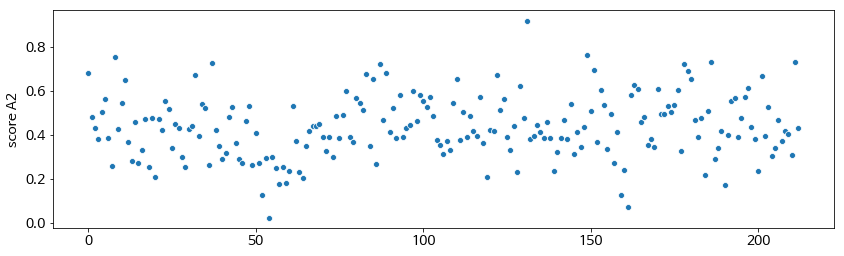

In [674]:
sns.scatterplot(starbucks_feature_drop_smallreview['score A2'].index, starbucks_feature_drop_smallreview['score A2'])

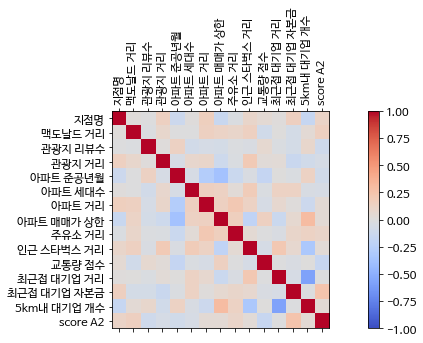

In [14]:
_ = xai.correlations(starbucks_feature_drop_smallreview, include_categorical=True, plot_type="matrix")

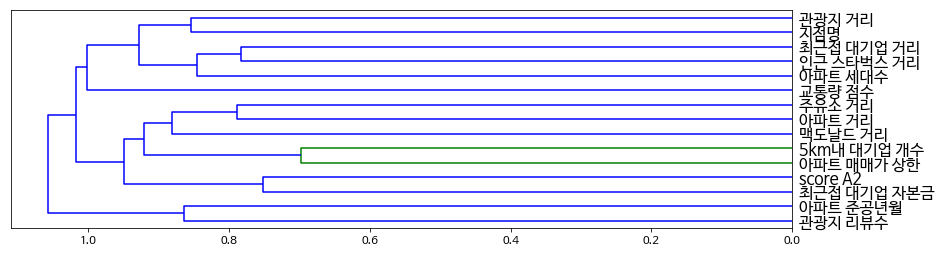

In [15]:
_ = xai.correlations(starbucks_feature_drop_smallreview, include_categorical=True)

In [9]:
# starbucks_feature_drop_smallreview = starbucks_feature_drop_smallreview.fillna(starbucks_feature_drop_smallreview.mean())
# starbucks_feature_drop_smallreview.to_excel('../starbucksDT/postprocess/Starbucks_Total_Feature_post_200713_최근지점제외_scoreA2_before_norm.xlsx', index=False)

In [10]:
# starbucks_feature_smallreview = starbucks_feature_smallreview.fillna(starbucks_feature_smallreview.mean())
# starbucks_feature_smallreview.to_excel('../starbucksDT/postprocess/Starbucks_Total_Feature_post_200713_최근지점만_scoreA2_before_norm.xlsx', index=False)

## 예측 결과 가시화용 함수 만들기

In [16]:
def reset_param():
    mpl.rcParams['axes.unicode_minus'] = False
    plt.rcParams['font.family'] = 'NanumBarunGothic'
    plt.rcParams['font.size'] = 11.5
    plt.rcParams['figure.figsize'] = (14,4)

def visualize_result(y_test, y_pred, title='test data', model_title='linearmodel'):
    plt.plot(y_test, color = 'red', label = 'Real data')
    plt.plot(y_pred, color = 'blue', label = 'Predicted data')
    plt.title(f'{model_title} Prediction {title}')
    plt.legend()
    plt.show()
    visualize_linear(y_test, y_pred)
    reset_param()
    
def visualize_linear(y_test, y_pred):
    plt.figure(figsize=(14,14))
    plt.scatter(y_test, y_pred, color = 'blue')
    x_len = len(y_test)
    x = np.linspace(0,1,x_len)
    plt.plot(x, x, color = 'red', label = 'ideal')
    plt.xlabel("DT Index : $Y_i$")
    plt.ylabel("Predicted DT Index: $\hat{Y}_i$")
    plt.title("DT Index vs Predicted DT Index: $Y_i$ vs $\hat{Y}_i$")
    plt.show()

## 학습/검증용 데이터 프레임 준비

In [17]:
df = starbucks_feature_drop_smallreview.copy()
feature_names = starbucks_feature_drop_smallreview.drop('지점명', axis=1).columns
feature_names.values

array(['맥도날드 거리', '관광지 리뷰수', '관광지 거리', '아파트 준공년월', '아파트 세대수', '아파트 거리',
       '아파트 매매가 상한', '주유소 거리', '인근 스타벅스 거리', '교통량 점수', '최근접 대기업 거리',
       '최근접 대기업 자본금', '5km내 대기업 개수', 'score A2'], dtype=object)

In [18]:
df = df.rename(columns={x:'_'.join(x.split(' ')) for x in feature_names.values})
df = df.rename(columns={'5km내_대기업_개수':'대기업개수'})
feature_names2 = df.drop(['지점명', 'score_A2'], axis=1).columns
feature_names2

Index(['맥도날드_거리', '관광지_리뷰수', '관광지_거리', '아파트_준공년월', '아파트_세대수', '아파트_거리',
       '아파트_매매가_상한', '주유소_거리', '인근_스타벅스_거리', '교통량_점수', '최근접_대기업_거리',
       '최근접_대기업_자본금', '대기업개수'],
      dtype='object')

## Train test split

In [19]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.1, random_state=0)
df_train.shape, df_test.shape

((191, 15), (22, 15))

## minmax normalization OR standard normalization

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


def normalization_train_test(df_train, df_test, method='standard'):
    if method=='standard':
        sc = StandardScaler()
    elif method=='minmax':
        sc = MinMaxScaler()

    df_train_sc = sc.fit_transform(df_train.drop('지점명', axis=1))
    df_test_sc = sc.transform(df_test.drop('지점명', axis=1))

    df_train_sc = pd.DataFrame(df_train_sc, columns=df_train.columns[1:], index=list(df_train.index.values))
    df_test_sc = pd.DataFrame(df_test_sc, columns=df_test.columns[1:], index=list(df_test.index.values))

    df_train_sc['지점명'] = df_train['지점명']
    df_test_sc['지점명'] = df_test['지점명']
    return df_train_sc, df_test_sc

## normalization method select

In [21]:
df_train_sc, df_test_sc = normalization_train_test(df_train, df_test, 'minmax')
x_train = df_train_sc[feature_names2].reset_index(drop=True)
y_train = df_train_sc.score_A2.reset_index(drop=True)
x_test = df_test_sc[feature_names2].reset_index(drop=True)
y_test = df_test_sc.score_A2.reset_index(drop=True)
print(f'train : {x_train.shape}, {y_train.shape} \ntest: {x_test.shape}, {y_test.shape}')

train : (191, 13), (191,) 
test: (22, 13), (22,)


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## k fold

In [22]:
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

In [23]:
cv = KFold(5, shuffle=True, random_state=0)

## model scores dictionary

In [147]:
kfold_models = {}
kfold_train_scores = {}
kfold_test_scores = {}
kfold_train_mae = {}
kfold_test_mae = {}
kfold_train_mse = {}
kfold_test_mse = {}
split_model_scores = {}
split_model_mse = {}
split_model_mae = {}

In [25]:
 from sklearn.metrics import explained_variance_score

## 회귀모델 (선형)

In [26]:
from sklearn.base import BaseEstimator, RegressorMixin
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [569]:
def kfold_test(model, df, train_features, label_feature, k=5, normalization='minmax'):
    models = []
    train_scores = np.zeros(k)
    train_mses = np.zeros(k)
    test_scores = np.zeros(k)
    test_mses = np.zeros(k)
    cv = KFold(k, shuffle=True, random_state=0)
    for i, (idx_train, idx_test) in enumerate(cv.split(df)):
        df_train = df.iloc[idx_train]
        df_test = df.iloc[idx_test]
        df_train, df_test = normalization_train_test(df_train, df_test, normalization)
        if model is None:
            model = sm.OLS.from_formula("score_A2 ~ " + " + ".join(feature_names2), data=df_train)
            result = model.fit()
            pred = result.predict(df_test)
            models.append(model)
        else:
            model.fit(df_train[train_features], df_train[label_feature])
            models.append(model)
        
        def get_score(df_, pred_):
            rss = ((df_[label_feature] - pred_) ** 2).sum()
            tss = ((df_[label_feature] - df_[label_feature].mean())** 2).sum()
            rsquared = 1 - rss / tss
            return rsquared
        train_score = get_score(df_train, model.predict(df_train[train_features]))
        test_score = get_score(df_test, model.predict(df_test[train_features]))
        train_scores[i] = train_score
        test_scores[i] = test_score
        train_mse = mean_squared_error(df_train[label_feature], model.predict(df_train[train_features]))
        test_mse = mean_squared_error(df_test[label_feature], model.predict(df_test[train_features]))
        train_mses[i] = train_mse
        test_mses[i] = test_mse
        print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(train_score, test_score))
    return train_scores, test_scores, models, train_mses, test_mses

def kfold_test_to_dicts(model_name, model, df, train_features, label_feature, k=5, normalization='minmax'):
    global kfold_models
    global kfold_train_scores
    global kfold_test_scores
    global kfold_train_mse
    global kfold_test_mse
    
    values = kfold_test(model, df, train_features, label_feature, k, normalization)
    kfold_models[model_name] = values[2]
    kfold_train_scores[model_name] = values[0]
    kfold_test_scores[model_name] = values[1]
    kfold_train_mse[model_name] = values[3]
    kfold_test_mse[model_name] = values[4]

## k fold using sklearn cross_val_score

In [28]:
class StatsmodelsOLS(BaseEstimator, RegressorMixin):
    def __init__(self, formula):
        self.formula = formula
        self.model = None
        self.data = None
        self.result = None
        
    def fit(self, dfX, dfy):
        self.data = pd.concat([dfX, dfy], axis=1)
        self.model = smf.ols(self.formula, data=self.data)
        self.result = self.model.fit()
        
    def predict(self, new_data):
        return self.result.predict(new_data)
    
model = StatsmodelsOLS("score_A2 ~ " + "+".join(feature_names2))
model.fit(x_train, y_train)
print(model.model)

In [29]:
# explained_variance_score(y_train, forest_model.predict(x_train))
# r2_score(y_train, forest_model.predict(x_train))

In [30]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
split_model_scores['linear'] = r2_score(y_test, linear_model.predict(x_test))
split_model_mse['linear'] = mean_squared_error(y_test, linear_model.predict(x_test))
split_model_mae['linear'] = mean_absolute_error(y_test, linear_model.predict(x_test))

In [566]:
kfold_train_scores['linear'], kfold_test_scores['linear'], kfold_models['linear'], kfold_train_mse['linear'], kfold_test_mse['linear'] = kfold_test(linear_model,df=df, train_features=feature_names2, label_feature='score_A2', k=10)

학습 R2 = 0.16200114, 검증 R2 = -0.20529575
학습 R2 = 0.12605369, 검증 R2 = -0.01932604
학습 R2 = 0.15510716, 검증 R2 = -0.02965392
학습 R2 = 0.16015026, 검증 R2 = -0.08787829
학습 R2 = 0.14687832, 검증 R2 = -0.31079915
학습 R2 = 0.15052211, 검증 R2 = -0.01020577
학습 R2 = 0.10962504, 검증 R2 = -0.00373921
학습 R2 = 0.16936261, 검증 R2 = -0.24007125
학습 R2 = 0.12664988, 검증 R2 = 0.18386106
학습 R2 = 0.14720875, 검증 R2 = -0.01490795


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.py

In [149]:
# pipeline_linear = make_pipeline(MinMaxScaler(), linear_model)
# kfold_model_scores['linear'] = cross_val_score(pipeline_linear, df[feature_names2], df.score_A2, scoring="r2", cv=cv)
# kfold_model_mse['linear'] = cross_val_score(pipeline_linear, df[feature_names2], df.score_A2, scoring="neg_mean_squared_error", cv=cv)
# kfold_model_mae['linear'] = cross_val_score(pipeline_linear, df[feature_names2], df.score_A2, scoring="neg_mean_absolute_error", cv=cv)
# print(kfold_model_scores)

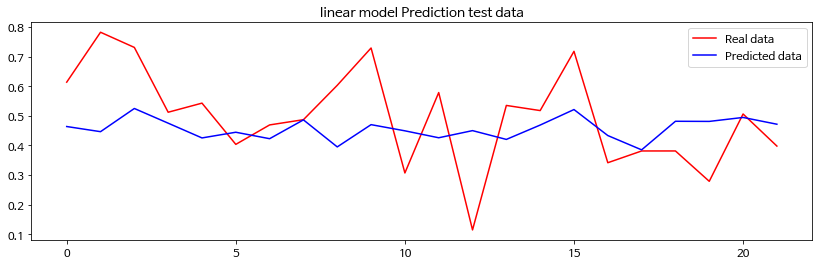

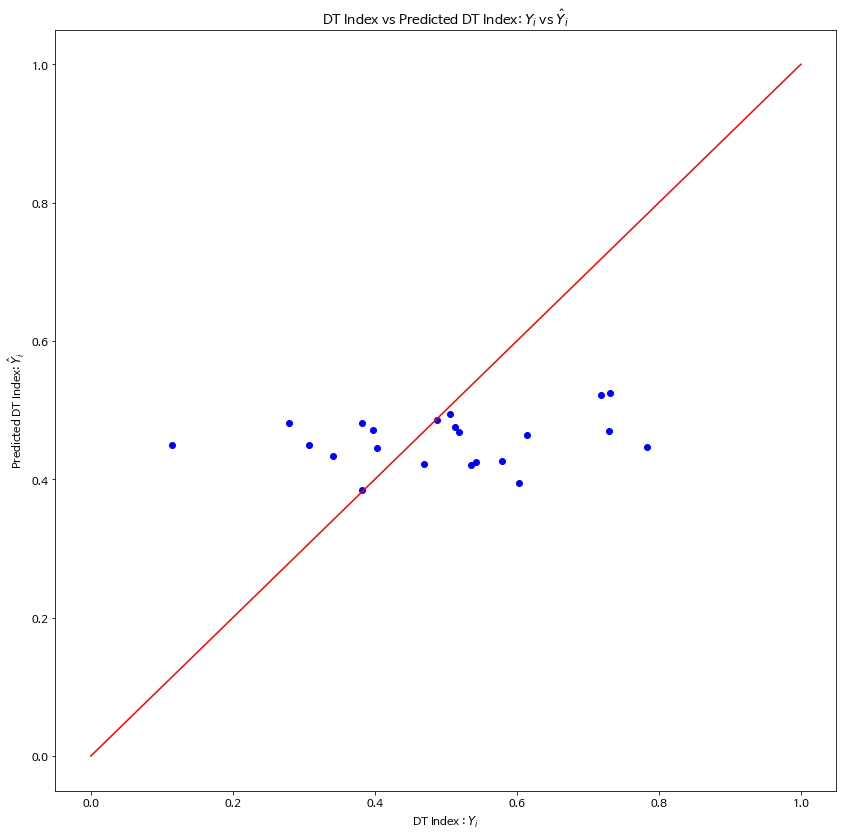

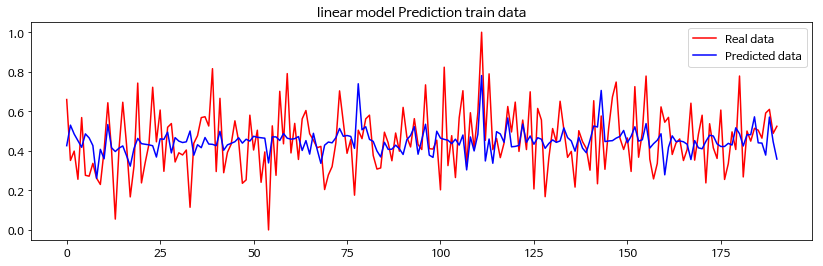

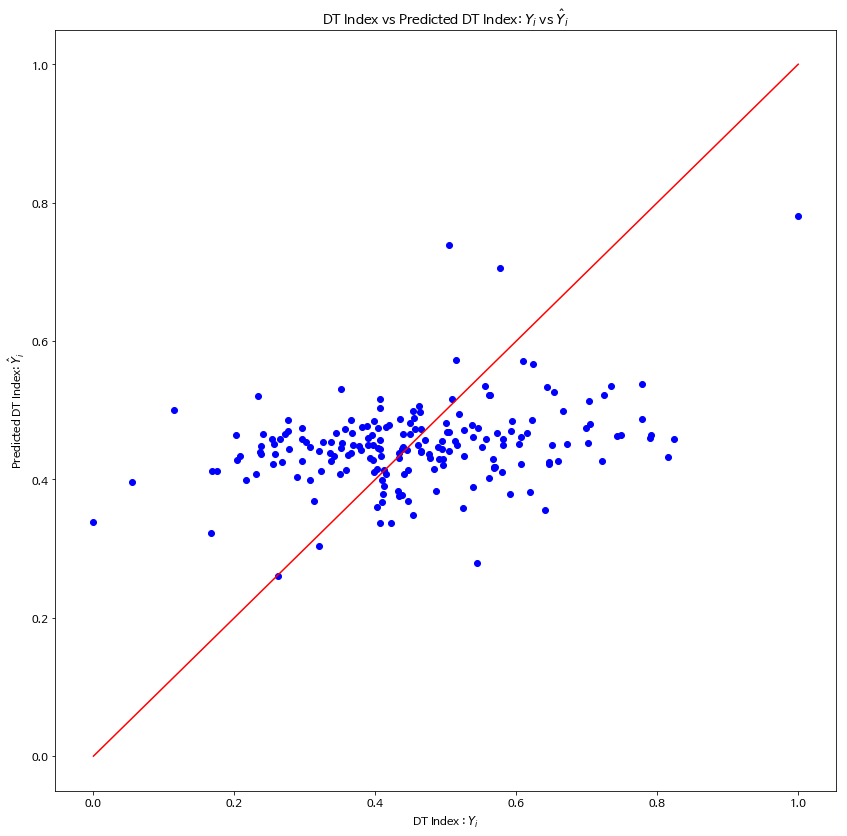

In [151]:
visualize_result(y_test, linear_model.predict(x_test), model_title='linear model')
visualize_result(y_train.values, linear_model.predict(x_train), 'train data', 'linear model')

In [152]:
def get_score(x, y, model):
    return r2_score(y, model.predict(x))

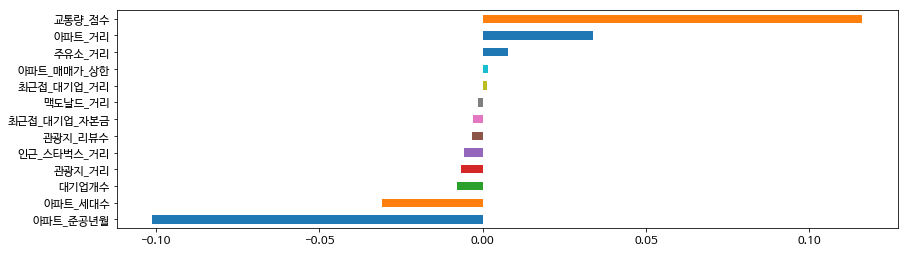

In [64]:
imp_score_feature = xai.feature_importance(x_test, y_test, lambda x,y:get_score(x,y,linear_model))

## DecisionTree Regressor

In [153]:
from sklearn.tree import DecisionTreeRegressor

In [171]:
decison_tree_regressor = DecisionTreeRegressor(max_depth=10)
decison_tree_regressor.fit(x_train, y_train)
score = decison_tree_regressor.score(x_test, y_test)

print(decison_tree_regressor.score(x_train, y_train))
print("decison_tree_regressor test score:"+str(score))

0.9530255814468724
decison_tree_regressor test score:-0.2912951016736587


In [187]:
kfold_train_scores['decison tree'], kfold_test_scores['decison tree'], kfold_models['decison tree'] = kfold_test(decison_tree_regressor,df=df, train_features=feature_names2, label_feature='score_A2', k=10)

학습 R2 = 0.95302558, 검증 R2 = -0.45645016
학습 R2 = 0.97848849, 검증 R2 = -0.51210925
학습 R2 = 0.89821907, 검증 R2 = -0.72717346
학습 R2 = 0.97643831, 검증 R2 = -1.59567092
학습 R2 = 0.89245700, 검증 R2 = -1.48057187
학습 R2 = 0.96077884, 검증 R2 = -0.80590904
학습 R2 = 0.97243713, 검증 R2 = -0.81299857
학습 R2 = 0.94187619, 검증 R2 = -1.28931587
학습 R2 = 0.89131209, 검증 R2 = -0.85232770
학습 R2 = 0.88193829, 검증 R2 = -1.22551664


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.py

In [173]:
split_model_scores['decison tree'] = r2_score(y_test, decison_tree_regressor.predict(x_test))
split_model_mse['decison tree'] = mean_squared_error(y_test, decison_tree_regressor.predict(x_test))
split_model_mae['decison tree'] = mean_absolute_error(y_test, decison_tree_regressor.predict(x_test))

In [174]:
# pipeline_tree = make_pipeline(MinMaxScaler(), decison_tree_regressor)
# kfold_model_scores['decison tree'] = cross_val_score(pipeline_tree, df[feature_names2], df.score_A2, scoring="r2", cv=cv)
# kfold_model_mse['decison tree'] = cross_val_score(pipeline_tree, df[feature_names2], df.score_A2, scoring="neg_mean_squared_error", cv=cv)
# kfold_model_mae['decison tree'] = cross_val_score(pipeline_tree, df[feature_names2], df.score_A2, scoring="neg_mean_absolute_error", cv=cv)

# print(kfold_model_scores)

In [79]:
split_model_scores

{'linear': -0.20529574945435458, 'decison tree': -0.4005317640572439}

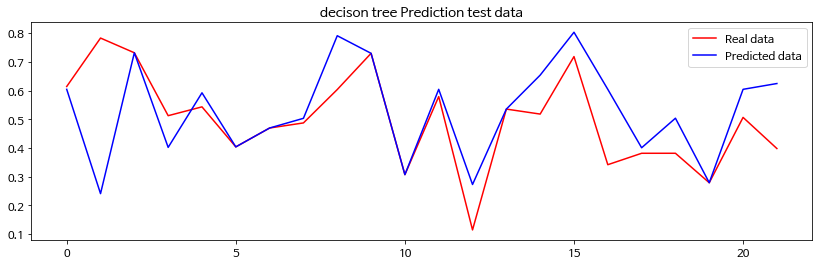

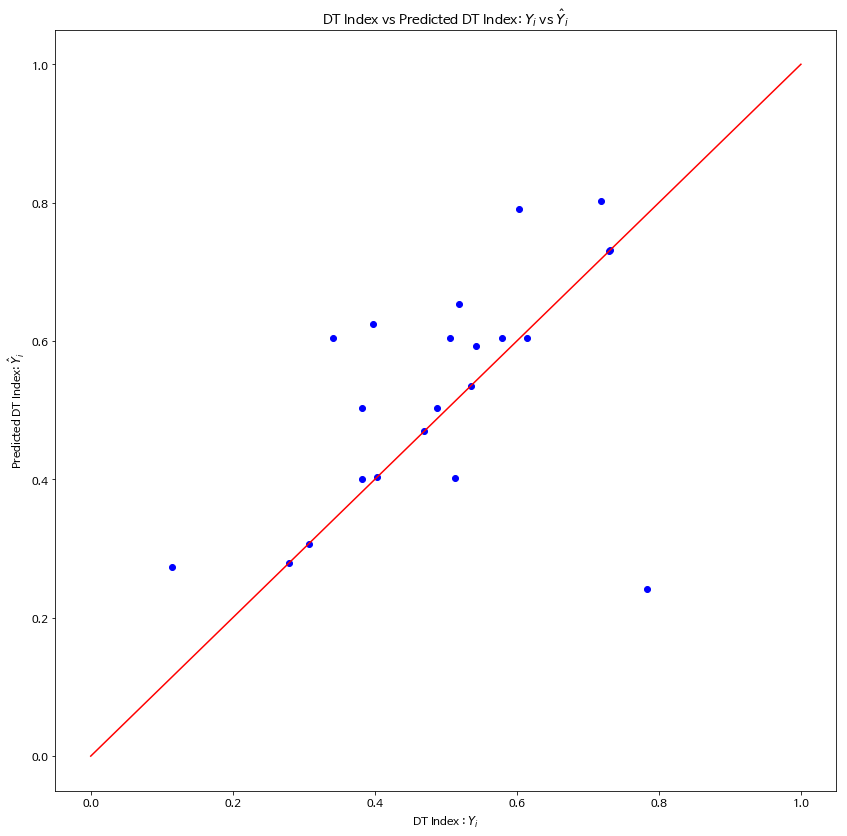

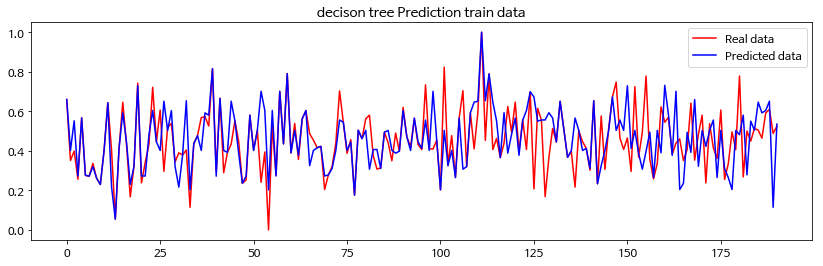

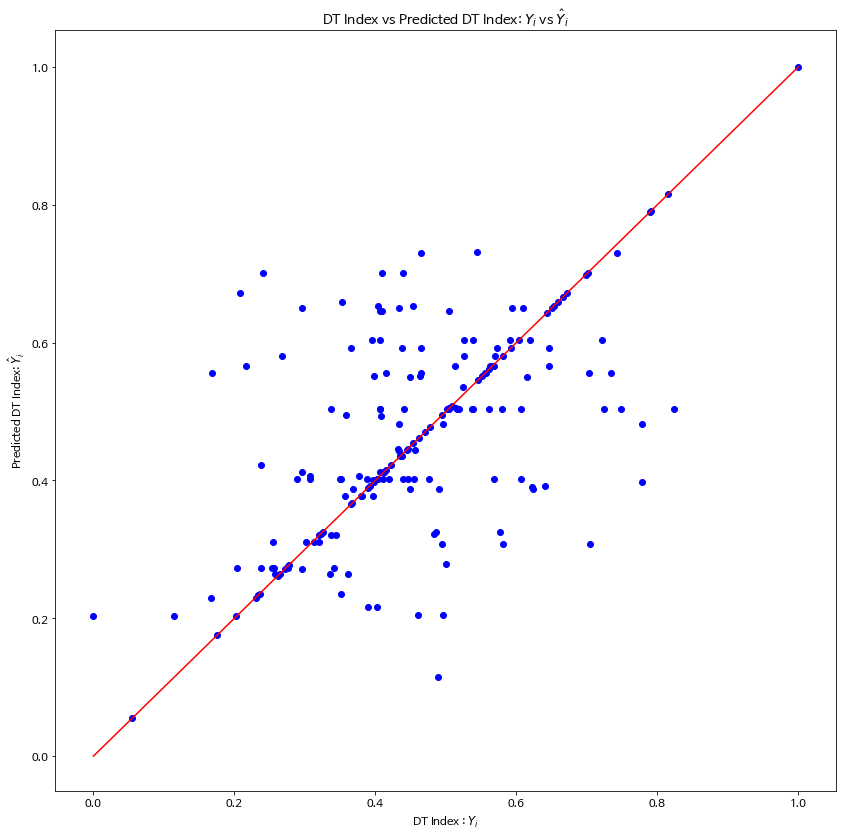

In [175]:
visualize_result(y_test.values, decison_tree_regressor.predict(x_test), 'test data', 'decison tree')
visualize_result(y_train.values, decison_tree_regressor.predict(x_train), 'train data', 'decison tree')

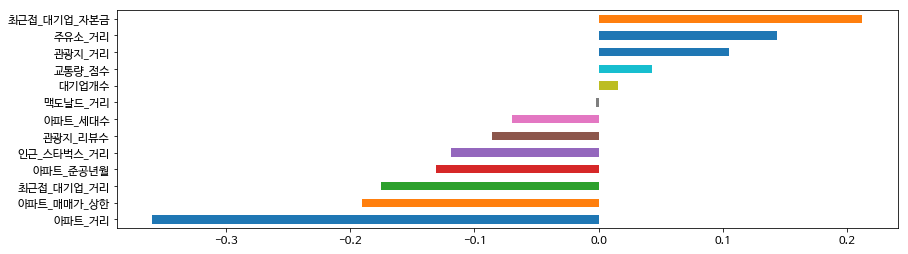

In [65]:
imp_score_feature = xai.feature_importance(x_test, y_test, lambda x,y:get_score(x,y,decison_tree_regressor))

## Random Forest

In [84]:
import pickle
from sklearn.ensemble import RandomForestRegressor

In [185]:
forest_model = RandomForestRegressor(n_estimators=50, n_jobs=-1, max_depth=37, random_state=0)

In [126]:
forest_model.fit(x_train, y_train)
print("Random forest test score:"+str(forest_model.score(x_train, y_train)))
print("Random forest test score:"+str(forest_model.score(x_test, y_test)))

Random forest test score:0.8690766731715699
Random forest test score:0.1614795588022072


## model save

In [177]:
# tuple_objects = (forest_model, x_train, y_train, forest_model.score(x_test, y_test))

# Save tuple
# pickle.dump(tuple_objects, open("forest_model.pkl", 'wb'))

# Restore tuple
# forest_model, pickled_Xtrain, pickled_Ytrain, pickled_score = pickle.load(open("forest_model.pkl", 'rb'))

In [186]:
kfold_train_scores['random foreset'], kfold_test_scores['random foreset'], kfold_models['random foreset'] = kfold_test(forest_model, df=df, train_features=feature_names2, label_feature='score_A2', k=10)

/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.87262874, 검증 R2 = 0.12369371


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.86134851, 검증 R2 = 0.03487706


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.86341874, 검증 R2 = 0.22655743


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.87596752, 검증 R2 = -0.21755002


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.87492138, 검증 R2 = 0.09300292


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.86401830, 검증 R2 = 0.12103602


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.86351558, 검증 R2 = -0.16950629


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.88526627, 검증 R2 = -0.15351750


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.86323944, 검증 R2 = 0.23546634


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.85700103, 검증 R2 = -0.19001054


In [180]:
split_model_scores['random foreset'] = r2_score(y_test, forest_model.predict(x_test))
split_model_mse['random foreset'] = mean_squared_error(y_test, forest_model.predict(x_test))
split_model_mae['random foreset'] = mean_absolute_error(y_test, forest_model.predict(x_test))

In [136]:
pipeline_forest = make_pipeline(MinMaxScaler(), forest_model)
kfold_model_scores['random foreset'] = cross_val_score(pipeline_forest, df[feature_names2], df.score_A2, scoring="r2", cv=cv, n_jobs=1)
kfold_model_mse['random foreset'] = cross_val_score(pipeline_forest, df[feature_names2], df.score_A2, scoring="neg_mean_squared_error", cv=cv, n_jobs=1)
kfold_model_mae['random foreset'] = cross_val_score(pipeline_forest, df[feature_names2], df.score_A2, scoring="neg_mean_absolute_error", cv=cv, n_jobs=1)

print(kfold_model_scores)

{'linear': array([-0.01211954, -0.04617426, -0.02813552, -0.21992824,  0.06382114]), 'decison tree': array([-0.21243217, -0.9233812 , -1.14892678, -0.85505925, -0.93961185])}


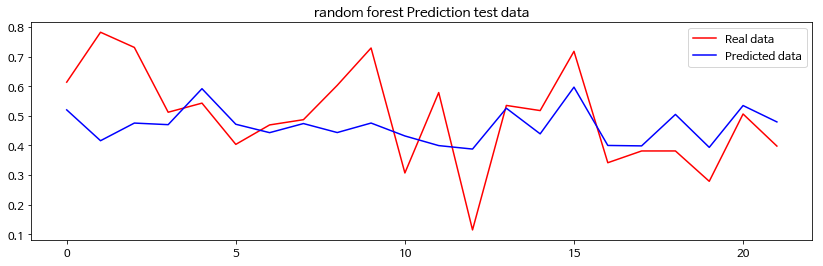

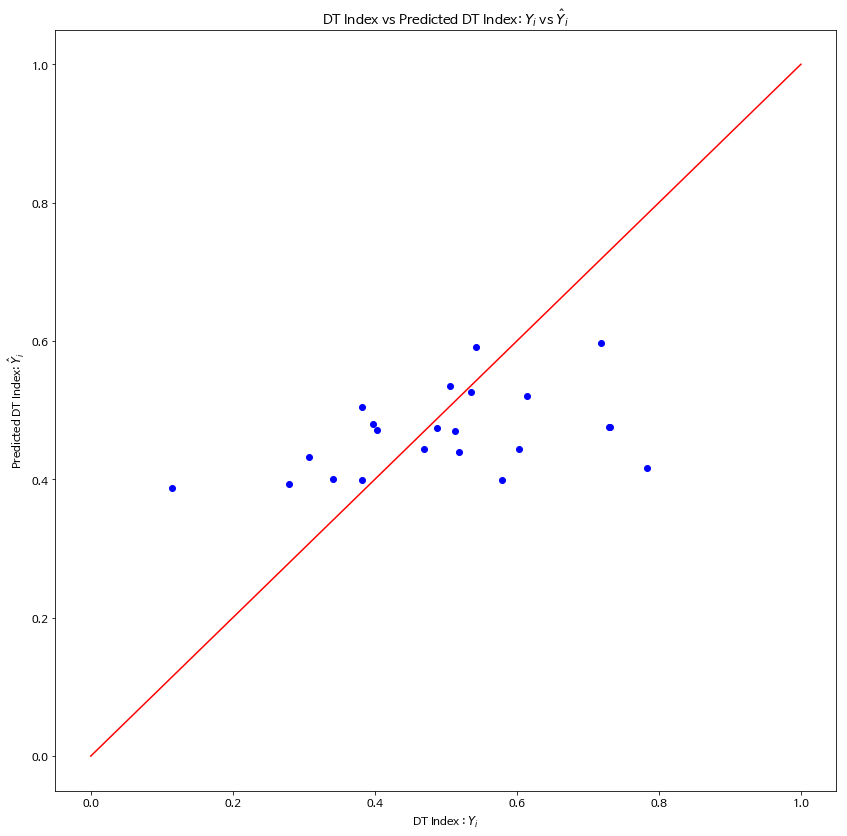

In [189]:
visualize_result(y_test.values, forest_model.predict(x_test), 'test data', 'random forest')

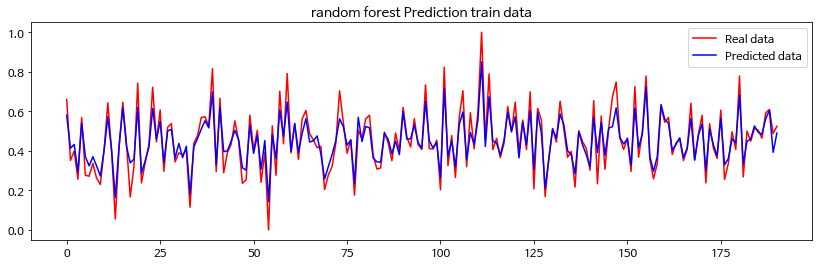

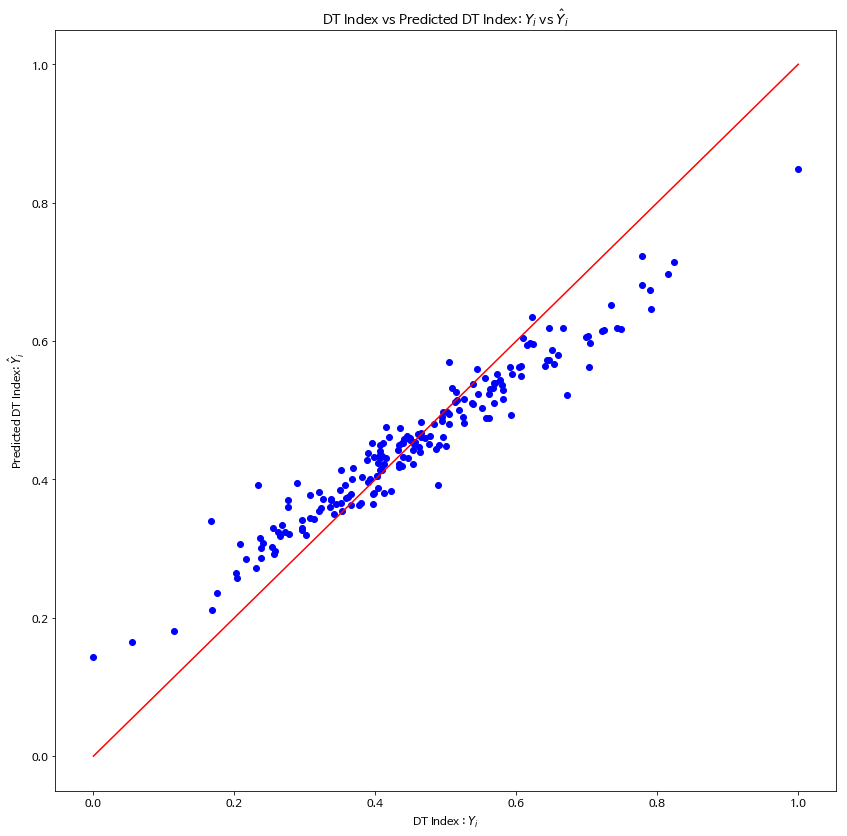

In [190]:
visualize_result(y_train.values, forest_model.predict(x_train), 'train data', 'random forest')

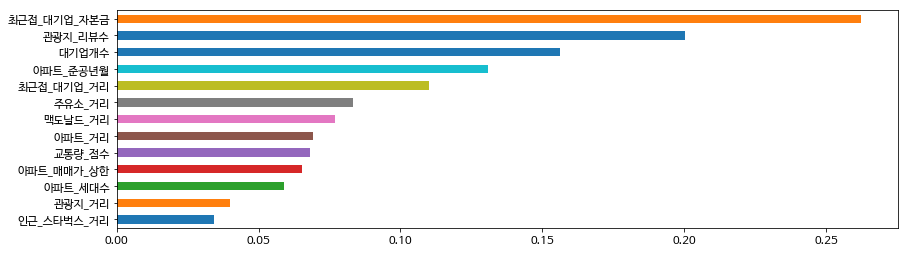

In [192]:
imp_score_feature = xai.feature_importance(x_train, y_train, lambda x,y:get_score(x,y,forest_model))

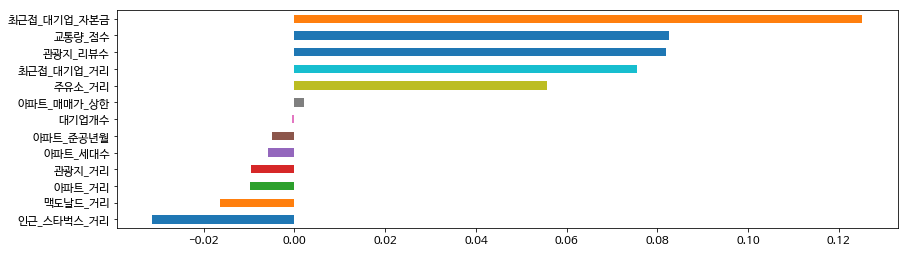

In [191]:
imp_score_feature = xai.feature_importance(x_test, y_test, lambda x,y:get_score(x,y,forest_model))

## gradient boosting

In [189]:
from sklearn import ensemble

In [214]:
params = {
    'n_estimators': 18,
    'max_depth': 3,
    'learning_rate': 1,
    'criterion': 'mse'
}

gradient_boosting_regressor = ensemble.GradientBoostingRegressor(**params)
gradient_boosting_regressor.fit(x_train, y_train)
print(gradient_boosting_regressor.score(x_train, y_train))
print(gradient_boosting_regressor.score(x_test, y_test))

0.9709101297948227
0.047529838265116475


In [216]:
kfold_train_scores

{'linear': array([0.16200114, 0.12605369, 0.15510716, 0.16015026, 0.14687832,
        0.15052211, 0.10962504, 0.16936261, 0.12664988, 0.14720875]),
 'decison tree': array([0.95302558, 0.97848849, 0.89821907, 0.97643831, 0.892457  ,
        0.96077884, 0.97243713, 0.94187619, 0.89131209, 0.88193829]),
 'random foreset': array([0.87262874, 0.86134851, 0.86341874, 0.87596752, 0.87492138,
        0.8640183 , 0.86351558, 0.88526627, 0.86323944, 0.85700103]),
 'gradient boosting': array([0.97091013, 0.96722211, 0.98108349, 0.96876582, 0.98281862,
        0.98092756, 0.9814499 , 0.97658889, 0.96454314, 0.98296902])}

In [215]:
kfold_train_scores['gradient boosting'], kfold_test_scores['gradient boosting'], kfold_models['gradient boosting'] = kfold_test(gradient_boosting_regressor, df=df, train_features=feature_names2, label_feature='score_A2', k=10)

학습 R2 = 0.97091013, 검증 R2 = 0.02369132
학습 R2 = 0.96722211, 검증 R2 = -0.11626373
학습 R2 = 0.98108349, 검증 R2 = -0.52446364
학습 R2 = 0.96876582, 검증 R2 = -1.26843239
학습 R2 = 0.98281862, 검증 R2 = -1.85577880
학습 R2 = 0.98092756, 검증 R2 = -0.16861643
학습 R2 = 0.98144990, 검증 R2 = -0.85968553
학습 R2 = 0.97658889, 검증 R2 = -1.09220433
학습 R2 = 0.96454314, 검증 R2 = -1.55869055
학습 R2 = 0.98296902, 검증 R2 = -1.65363115


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.py

In [287]:
split_model_scores['gradient boosting'] = r2_score(y_test, gradient_boosting_regressor.predict(x_test))
split_model_mse['gradient boosting'] = mean_squared_error(y_test, gradient_boosting_regressor.predict(x_test))
split_model_mae['gradient boosting'] = mean_absolute_error(y_test, gradient_boosting_regressor.predict(x_test))

In [288]:
pipeline_gradient_boosting = make_pipeline(MinMaxScaler(), gradient_boosting_regressor)
kfold_model_scores['gradient boosting']=cross_val_score(pipeline_gradient_boosting, df[feature_names2], df.score_A2, scoring="neg_mean_squared_error", cv=cv)
kfold_model_mse['gradient boosting'] = cross_val_score(pipeline_gradient_boosting, df[feature_names2], df.score_A2, scoring="neg_mean_squared_error", cv=cv)
kfold_model_mae['gradient boosting'] = cross_val_score(pipeline_gradient_boosting, df[feature_names2], df.score_A2, scoring="neg_mean_absolute_error", cv=cv)
print(kfold_model_scores)

{'linear': array([-0.01211954, -0.04617426, -0.02813552, -0.21992824,  0.06382114]), 'gradient boosting': array([-0.02830622, -0.03564213, -0.03715858, -0.04009351, -0.027843  ])}


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/scikit_learn-0.20.1-py3.7-macosx-10.15-x86_64.egg/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/scikit_learn-0.20.1-py3.7-macosx-10.15-x86_64.egg/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/scikit_learn-0.20.1-py3.7-macosx-10.15-x86_64.egg/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/scikit_learn-0.20.1-py3.7-macosx-10.15-x

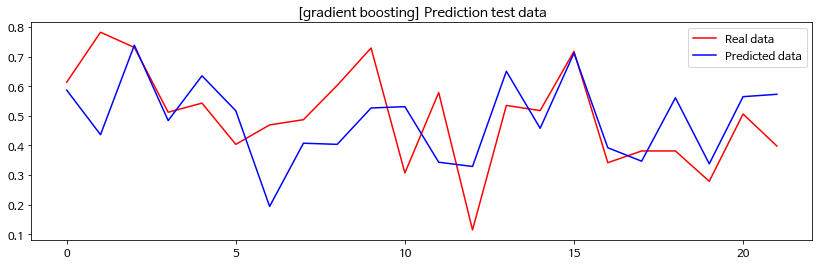

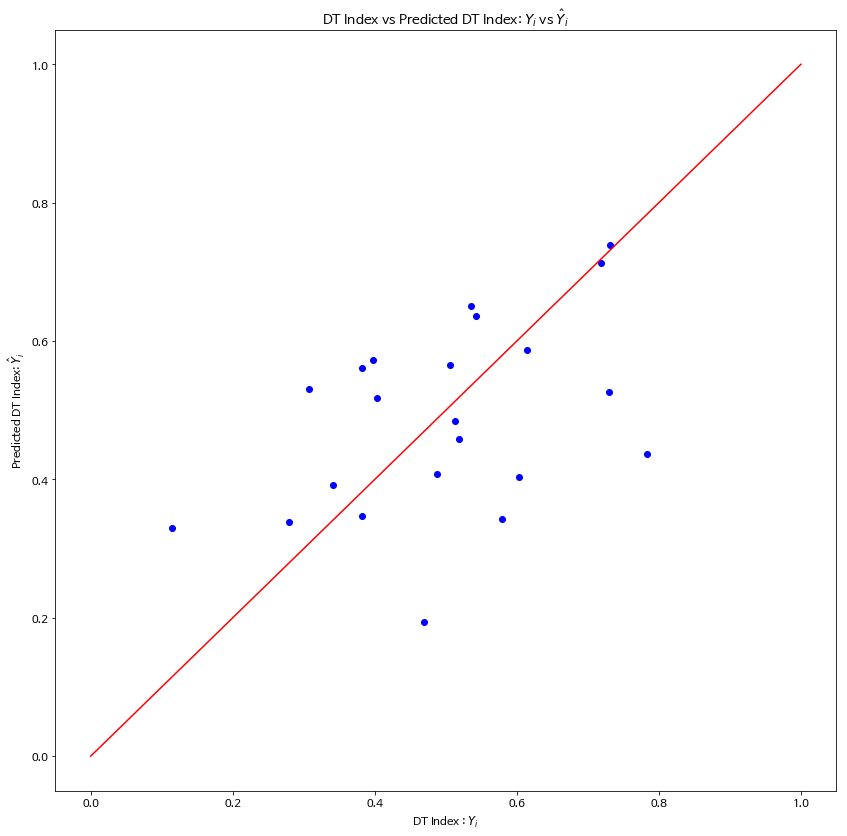

In [290]:
visualize_result(y_test.values, gradient_boosting_regressor.predict(x_test), 'test data', '[gradient boosting]')

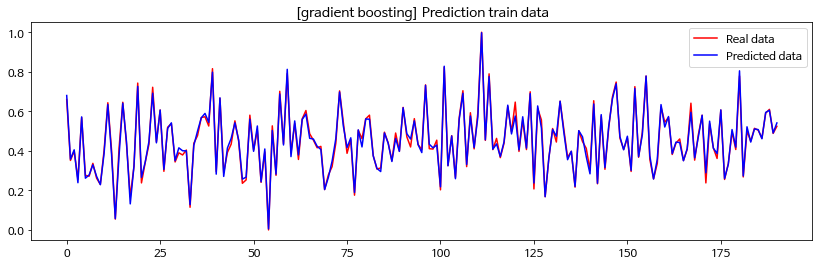

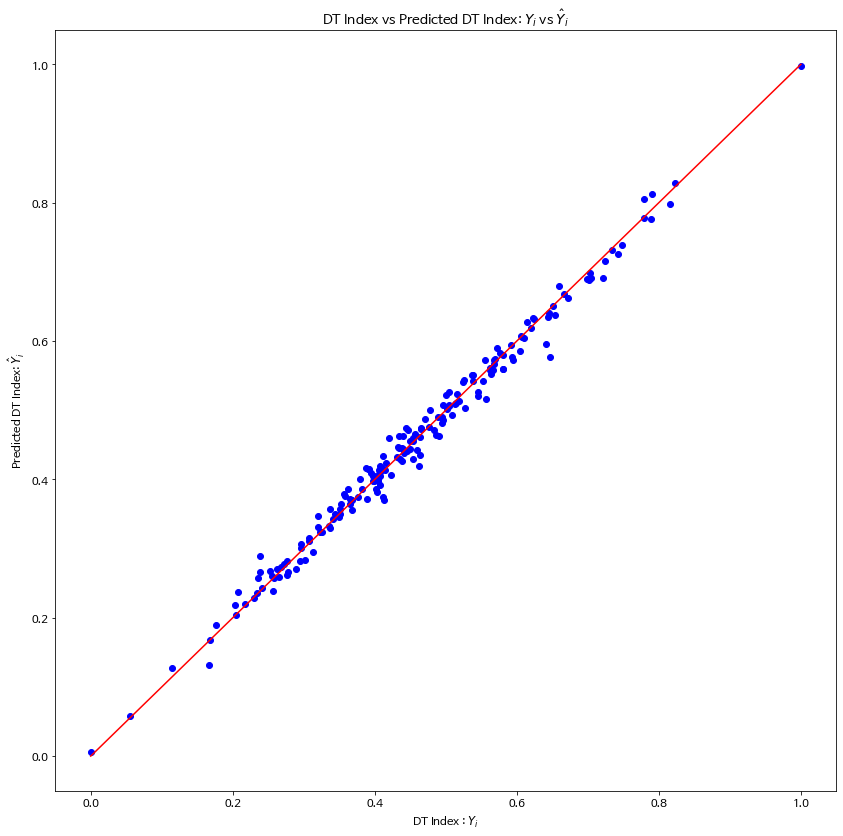

In [105]:
visualize_result(y_train.values, gradient_boosting_regressor.predict(x_train), 'train data', '[gradient boosting]')

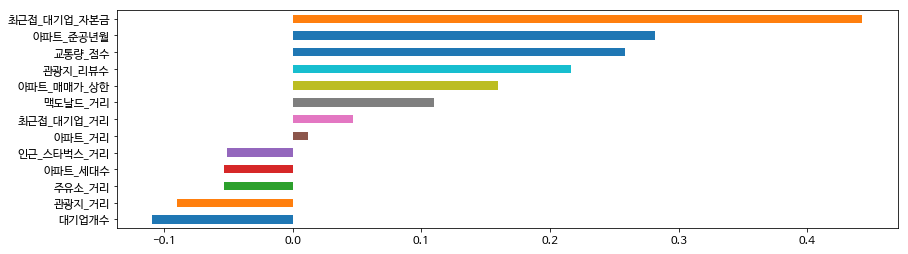

In [291]:
imp_score_feature = xai.feature_importance(x_test, y_test, lambda x,y:get_score(x,y,gradient_boosting_regressor))

## AdaBoost regression

### decisonTree ensemble

In [217]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor

In [219]:
ada_boost_basic = ensemble.AdaBoostRegressor(DecisionTreeRegressor(max_depth=100))
ada_boost_basic.fit(x_train, y_train)
print(ada_boost_basic.score(x_train, y_train))
print(ada_boost_basic.score(x_test, y_test))

0.9998997414892347
0.0986742447184209


In [220]:
kfold_train_scores['adaboost decison tree'], kfold_test_scores['adaboost decison tree'], kfold_models['adaboost decison tree'] = kfold_test(ada_boost_basic, df=df, train_features=feature_names2, label_feature='score_A2', k=10)

/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.99942376, 검증 R2 = 0.06087793
학습 R2 = 0.99945817, 검증 R2 = 0.13208242
학습 R2 = 0.99999959, 검증 R2 = 0.13713086


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.99974242, 검증 R2 = -0.11471165
학습 R2 = 0.99955571, 검증 R2 = -0.22253198
학습 R2 = 0.99985856, 검증 R2 = 0.25874419


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.99992856, 검증 R2 = -0.14968611
학습 R2 = 0.99968170, 검증 R2 = 0.00903394
학습 R2 = 0.99899250, 검증 R2 = 0.27147373
학습 R2 = 0.99970926, 검증 R2 = -0.08770827


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [324]:
split_model_scores['adaboost decison tree'] = r2_score(y_test, ada_boost_basic.predict(x_test))
split_model_mse['adaboost decison tree'] = mean_squared_error(y_test, ada_boost_basic.predict(x_test))
split_model_mae['adaboost decison tree'] = mean_absolute_error(y_test, ada_boost_basic.predict(x_test))

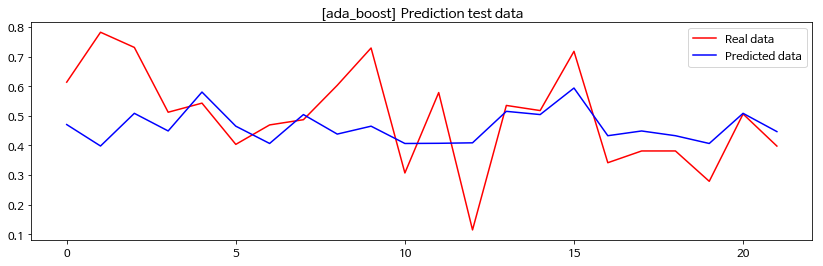

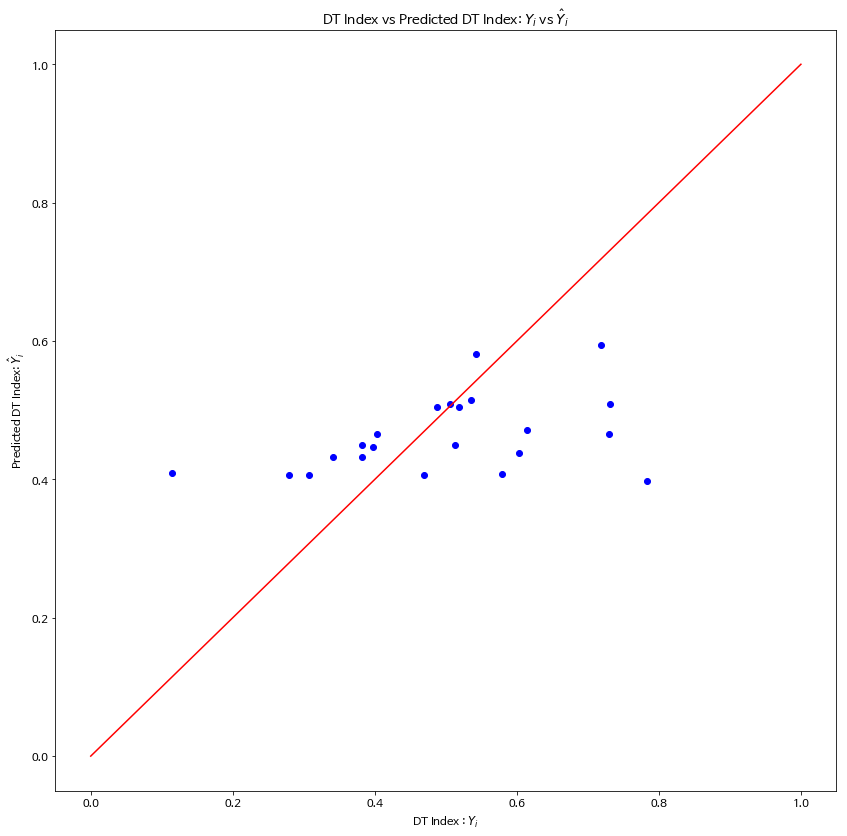

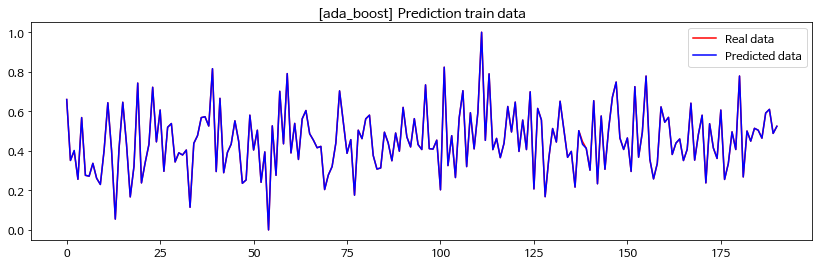

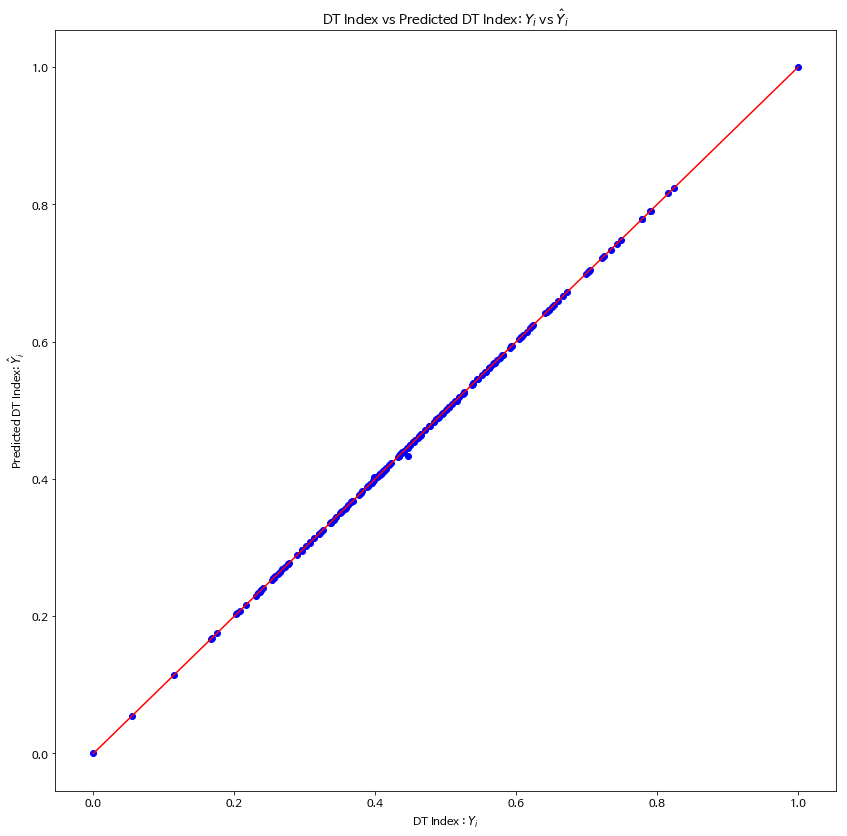

In [331]:
visualize_result(y_test.values, ada_boost_basic.predict(x_test), 'test data', '[ada_boost]')
visualize_result(y_train.values, ada_boost_basic.predict(x_train), 'train data', '[ada_boost]')

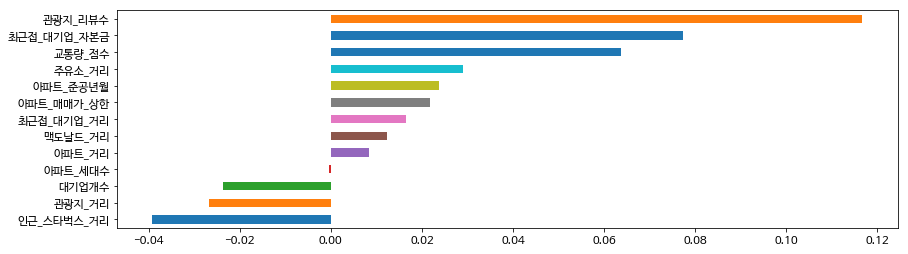

In [332]:
imp_score_feature = xai.feature_importance(x_test, y_test, lambda x,y:get_score(x,y,ada_boost_basic))

### randomForest ensemble

In [221]:
ada_boost_regressor = ensemble.AdaBoostRegressor(RandomForestRegressor(n_estimators=40, n_jobs=-1, random_state=0))
ada_boost_regressor.fit(x_train, y_train)
print(ada_boost_regressor.score(x_train, y_train))
print(ada_boost_regressor.score(x_test, y_test))

0.9368079884366324
0.1825015402678839


In [222]:
kfold_train_scores['random foreset ensemble'], kfold_test_scores['random foreset ensemble'], kfold_models['random foreset ensemble'] = kfold_test(ada_boost_regressor, df=df, train_features=feature_names2, label_feature='score_A2', k=10)

/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.93825740, 검증 R2 = 0.13378575


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.93276607, 검증 R2 = 0.08654528


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.93219604, 검증 R2 = 0.13785642


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.93431882, 검증 R2 = -0.17519577


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.93753989, 검증 R2 = 0.10774283


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.93359054, 검증 R2 = 0.17514565


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.93590597, 검증 R2 = -0.08648224


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.93299023, 검증 R2 = -0.03307423


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.93473710, 검증 R2 = 0.13486835


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.93520320, 검증 R2 = 0.07920361


In [327]:
split_model_scores['adaboost random foreset'] = r2_score(y_test, ada_boost_regressor.predict(x_test))
split_model_mse['adaboost random foreset'] = mean_squared_error(y_test, ada_boost_regressor.predict(x_test))
split_model_mae['adaboost random foreset'] = mean_absolute_error(y_test, ada_boost_regressor.predict(x_test))

In [329]:
pipeline_adaboost_forest = make_pipeline(MinMaxScaler(), ada_boost_regressor)
# kfold_model_scores['adaboost random foreset'] = cross_val_score(pipeline_adaboost_forest, df[feature_names2], df.score_A2, scoring="r2", cv=cv)
# kfold_model_mse['adaboost random foreset'] = cross_val_score(pipeline_adaboost_forest, df[feature_names2], df.score_A2, scoring="neg_mean_squared_error", cv=cv)
# kfold_model_mae['adaboost random foreset'] = cross_val_score(pipeline_adaboost_forest, df[feature_names2], df.score_A2, scoring="neg_mean_absolute_error", cv=cv)

print(kfold_model_scores)

{'linear': array([-0.01211954, -0.04617426, -0.02813552, -0.21992824,  0.06382114]), 'gradient boosting': array([-0.02830622, -0.03564213, -0.03715858, -0.04009351, -0.027843  ])}


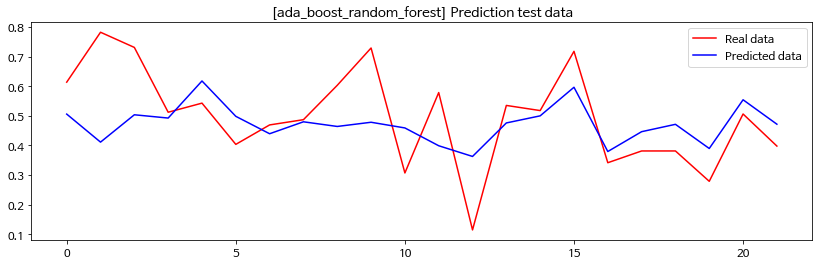

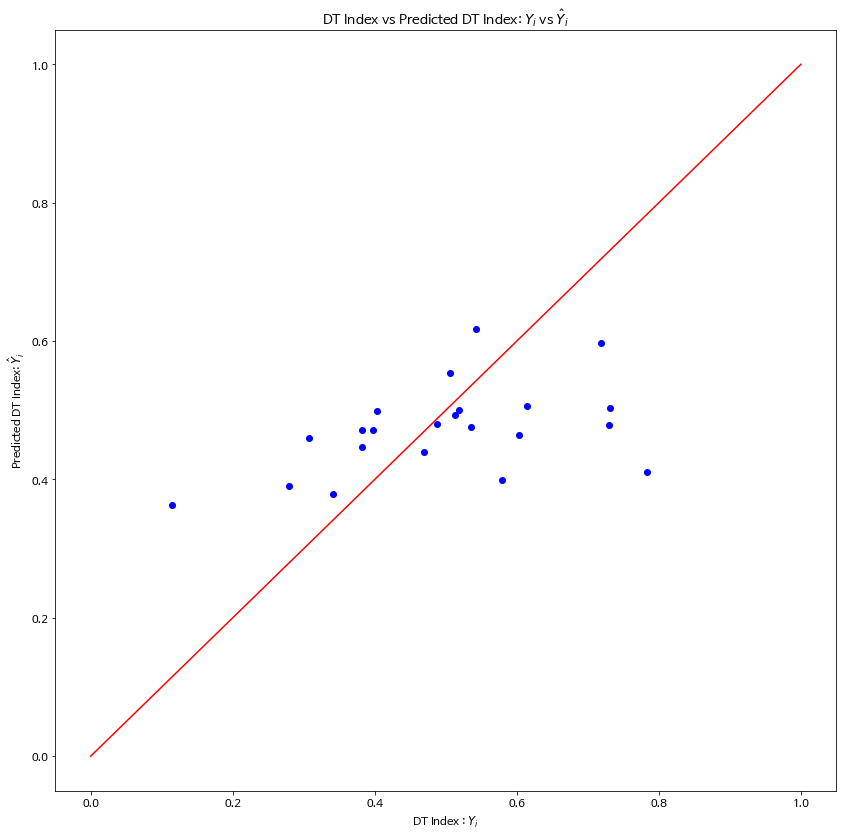

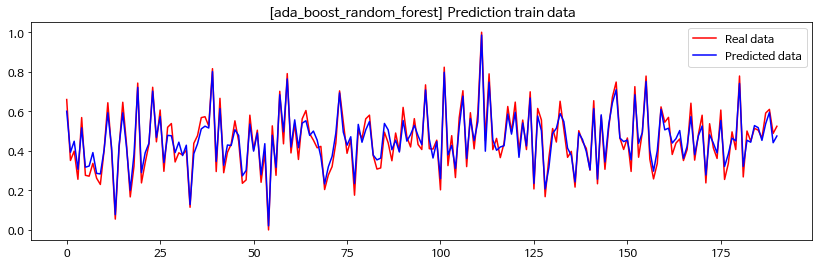

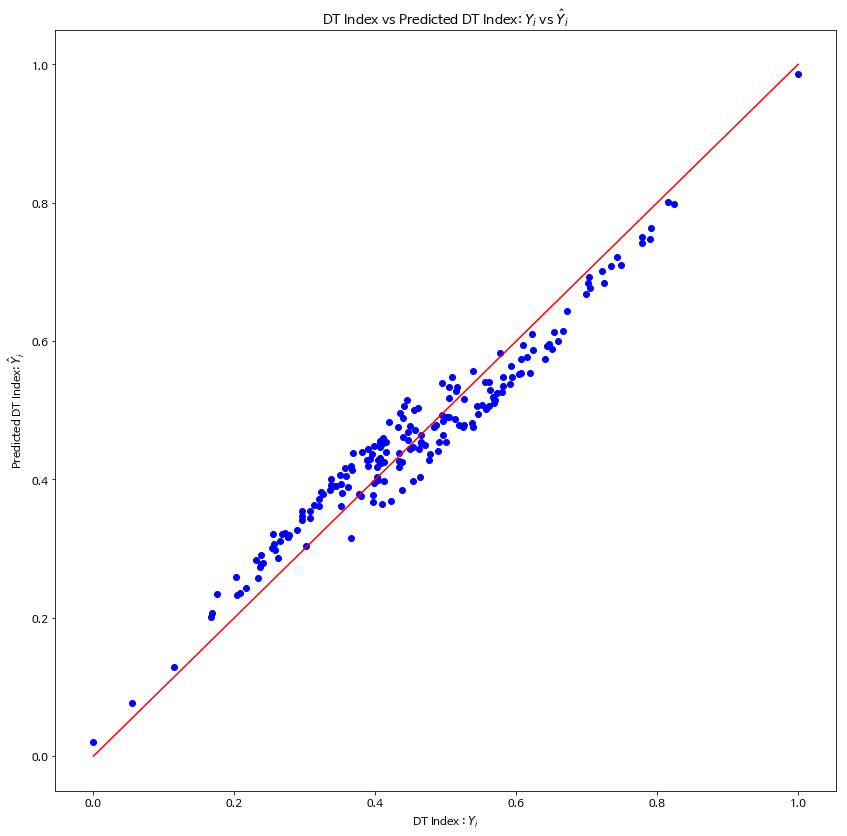

In [330]:
visualize_result(y_test.values, ada_boost_regressor.predict(x_test), 'test data', '[ada_boost_random_forest]')
visualize_result(y_train.values, ada_boost_regressor.predict(x_train), 'train data', '[ada_boost_random_forest]')

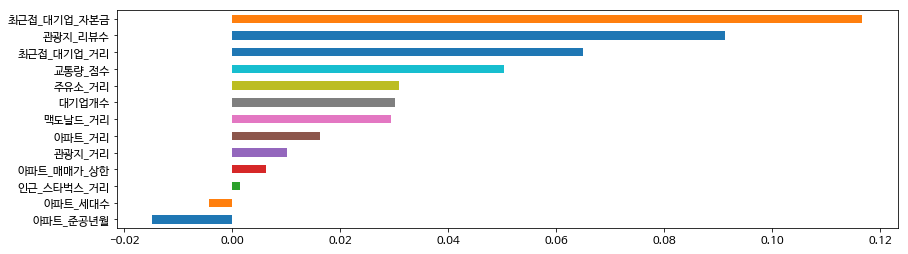

In [333]:
imp_score_feature = xai.feature_importance(x_test, y_test, lambda x,y:get_score(x,y,ada_boost_regressor))

## MLP regression

In [349]:
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Dropout, BatchNormalization, LayerNormalization
from keras.wrappers.scikit_learn import KerasRegressor
from keras.losses import mean_squared_error, mean_absolute_error
from keras.callbacks import EarlyStopping

In [418]:
def mlp_kfold_test(model, df, train_features, label_feature, k=5, normalization='minmax'):
    models = []
    histories = []
    train_scores = np.zeros(k)
    test_scores = np.zeros(k)
    
    early_stop = EarlyStopping(monitor='val_loss', patience=50)
    cv = KFold(k, shuffle=True, random_state=0)
    for i, (idx_train, idx_test) in enumerate(cv.split(df)):
        df_train = df.iloc[idx_train]
        df_test = df.iloc[idx_test]
        df_train, df_test = normalization_train_test(df_train, df_test, normalization)
        
        history = model.fit(df_train[train_features], df_train[label_feature], 
                            validation_data = (df_test[train_features], df_test[label_feature]), 
                            epochs=300, batch_size=8, verbose=0, 
                            shuffle=True,
                            callbacks=[early_stop])
        models.append(model)
#         histories.append(history)
        
        def get_score(df_, pred_):
            rss = ((df_[label_feature] - pred_) ** 2).sum()
            tss = ((df_[label_feature] - df_[label_feature].mean())** 2).sum()
            rsquared = 1 - rss / tss
            return rsquared
        train_score = get_score(df_train, model.predict(df_train[train_features]))
        test_score = get_score(df_test, model.predict(df_test[train_features]))

        train_scores[i] = train_score
        test_scores[i] = test_score
        print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(train_score, test_score))
    return train_scores, test_scores, models

In [523]:
from keras import backend as K

def coeff_determination(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

def BuildModel():
    model = Sequential([
        Dense(300, kernel_initializer='normal', input_shape=(13,), activation = "selu"), 
        BatchNormalization(),
        Dense(300, kernel_initializer='normal', activation = "selu"),
        BatchNormalization(),
        Dense(300, kernel_initializer='normal', activation = "selu"),
        BatchNormalization(),
        Dense(150, kernel_initializer='normal', activation = "selu"),
        BatchNormalization(),
        Dense(150, kernel_initializer='normal', activation = "selu"),
        BatchNormalization(),
        Dense(1, kernel_initializer='normal', activation = "sigmoid"), 
        ])
#     model.add(Dense(1, activation='sigmoid'))
    model.compile(loss=mean_squared_error, optimizer=optimizers.Adam(lr=0.0001), metrics=[coeff_determination, 'mse'])
#     model.summary()
    return model
MLP_regressor = KerasRegressor(build_fn=BuildModel)

In [526]:
early_stop = EarlyStopping(monitor='val_loss', patience=50)
history = MLP_regressor.fit(x_train, y_train, 
                            validation_data = (x_test, y_test), 
                            epochs=100, batch_size=8, verbose=1, 
                            shuffle=True,
                            callbacks=[early_stop])
# BuildModel().summary()

Epoch 1/100
24/24 [==============================] - 0s 9ms/step - loss: 0.0365 - coeff_determination: -0.8115 - mse: 0.0365 - val_loss: 0.0255 - val_coeff_determination: -1.0770 - val_mse: 0.0255
Epoch 2/100
24/24 [==============================] - 0s 4ms/step - loss: 0.0299 - coeff_determination: -0.5689 - mse: 0.0299 - val_loss: 0.0255 - val_coeff_determination: -0.6980 - val_mse: 0.0255
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 0.0258 - coeff_determination: -0.4568 - mse: 0.0258 - val_loss: 0.0258 - val_coeff_determination: -0.7448 - val_mse: 0.0258
Epoch 4/100
24/24 [==============================] - 0s 4ms/step - loss: 0.0241 - coeff_determination: -0.1596 - mse: 0.0241 - val_loss: 0.0258 - val_coeff_determination: -0.6307 - val_mse: 0.0258
Epoch 5/100
24/24 [==============================] - 0s 4ms/step - loss: 0.0242 - coeff_determination: -0.3273 - mse: 0.0242 - val_loss: 0.0262 - val_coeff_determination: -0.5898 - val_mse: 0.0262
Epoch 6/100
24/

In [525]:
histories = []
kfold_train_scores['mlp regressor'], kfold_test_scores['mlp regressor'], kfold_models['mlp regressor'] = mlp_kfold_test(MLP_regressor, df=df, train_features=feature_names2, label_feature='score_A2', k=10, normalization='minmax')

/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.48282390, 검증 R2 = -0.74748435


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.60069488, 검증 R2 = -0.07877381


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.36283544, 검증 R2 = -0.48109556


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.49110662, 검증 R2 = -0.45179610


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.53263747, 검증 R2 = -0.13272782


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.57476269, 검증 R2 = -0.24497958


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.64915122, 검증 R2 = -0.01995086


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.53393497, 검증 R2 = -0.58399687


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.51233428, 검증 R2 = 0.17589308


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.52637038, 검증 R2 = -0.18094076


In [410]:
split_model_scores['mlp regressor'] = r2_score(y_test, MLP_regressor.predict(x_test))

In [527]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,coeff_determination,mse,val_loss,val_coeff_determination,val_mse,epoch
68,0.014809,0.181454,0.014809,0.035340,-1.673295,0.035340,68
69,0.014023,0.150060,0.014023,0.033694,-1.366236,0.033694,69
70,0.014947,-0.011894,0.014947,0.032667,-1.655724,0.032667,70
71,0.015636,0.075326,0.015636,0.032213,-0.972238,0.032213,71
72,0.015333,0.198249,0.015333,0.033927,-1.406482,0.033927,72


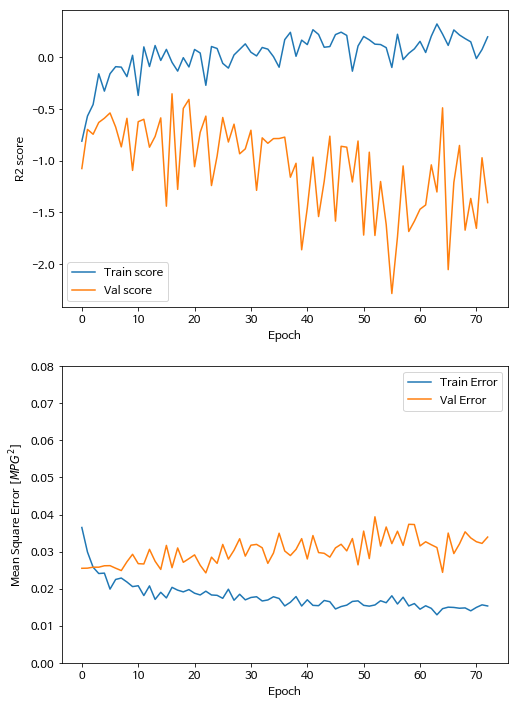

In [532]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(8,12))

    plt.subplot(2,1,1)
    plt.xlabel('Epoch')
    plt.ylabel('R2 score')
    plt.plot(hist['epoch'], hist['coeff_determination'],
           label='Train score')
    plt.plot(hist['epoch'], hist['val_coeff_determination'],
           label = 'Val score')
#     plt.ylim([0,0.2])
    plt.legend()

    plt.subplot(2,1,2)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
    plt.ylim([0,0.08])
    plt.legend()
    plt.show()
    
plot_history(history)

In [533]:
y_train_pred = MLP_regressor.predict(x_train)
y_test_pred = MLP_regressor.predict(x_test)

#check a mean squared error rate
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print(f'mse_train : {mse_train}, mse_test : {mse_test}')

mse_train : 0.010784797370433807, mse_test : 0.03392663598060608


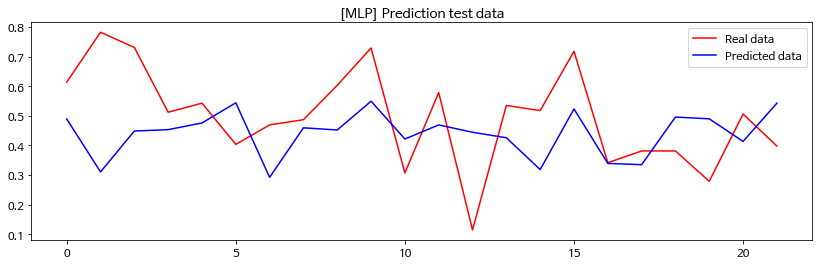

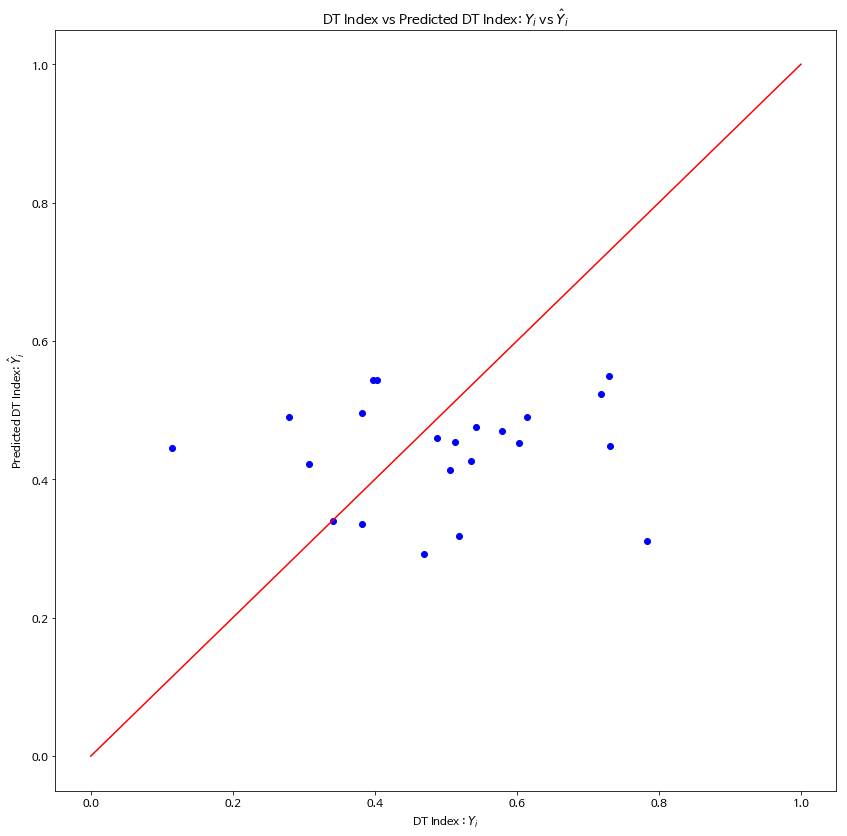

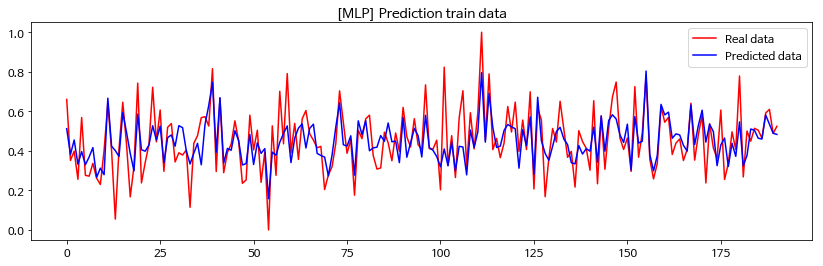

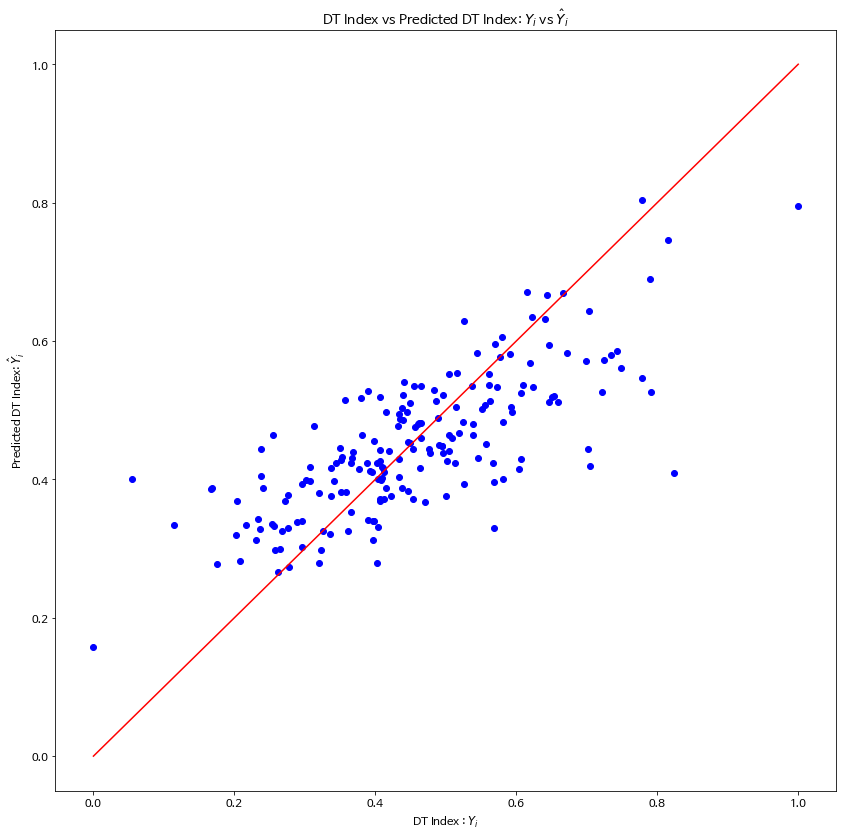

In [534]:
visualize_result(y_test.values, MLP_regressor.predict(x_test), 'test data', '[MLP]')
visualize_result(y_train.values, MLP_regressor.predict(x_train), 'train data', '[MLP]')

In [535]:
split_model_scores['mlp regressor'] = r2_score(y_test, MLP_regressor.predict(x_test))
split_model_mse['mlp regressor'] = mean_squared_error(y_test, MLP_regressor.predict(x_test))
split_model_mae['mlp regressor'] = mean_absolute_error(y_test, MLP_regressor.predict(x_test))

In [536]:
# pipeline_regressor = make_pipeline(MinMaxScaler(), MLP_regressor)
# kfold_model_scores['mlp regressor']=cross_val_score(pipeline_regressor, df[feature_names2], df.score_A2, scoring="neg_mean_squared_error", cv=cv)
# kfold_model_mse['mlp regressor'] = cross_val_score(pipeline_regressor, df[feature_names2], df.score_A2, scoring="neg_mean_squared_error", cv=cv)
# kfold_model_mae['mlp regressor'] = cross_val_score(pipeline_regressor, df[feature_names2], df.score_A2, scoring="neg_mean_absolute_error", cv=cv)
print(kfold_model_scores)

{'linear': array([-0.01211954, -0.04617426, -0.02813552, -0.21992824,  0.06382114]), 'decison tree': array([-0.21243217, -0.9233812 , -1.14892678, -0.85505925, -0.93961185])}


In [777]:
kfold_model_scores_DF = pd.DataFrame(kfold_model_scores)

In [778]:
kfold_model_mae

{'linear': array([-0.13456298, -0.11856307, -0.09628876, -0.12224643, -0.09588275]),
 'gradient boosting': array([-0.14819515, -0.15055032, -0.14785487, -0.15378109, -0.11555341])}

In [779]:
kfold_model_scores_DF

,linear,random foreset,gradient boosting
0,-0.012120,NaN,-0.031439
1,-0.046174,NaN,-0.038264
2,-0.028136,NaN,-0.038696
3,-0.219928,NaN,-0.037519
4,0.063821,NaN,-0.025644


In [780]:
kfold_model_scores_DF.mean()

linear              -0.048507
random foreset            NaN
gradient boosting   -0.034312
dtype: float64

In [801]:
s = pd.DataFrame(columns=split_model_scores.keys())
s.loc['mse',:] = split_model_mse
s.loc['mae',:] = split_model_mae
s.loc['scores',:] = split_model_scores
s

,linear,random foreset,gradient boosting,mlp regressor
mse,"tf.Tensor(0.031541400922309254, shape=(), dtyp...","tf.Tensor(0.00704127165286421, shape=(), dtype...","tf.Tensor(0.04015635692780509, shape=(), dtype...","tf.Tensor(0.034646653, shape=(), dtype=float32)"
mae,0.147199,0.0686205,0.146509,0.152128
scores,-0.205296,0.730931,-0.5345,-0.323957


In [591]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto')
svr_rbf.fit(x_train, y_train)
svr_lin.fit(x_train, y_train)
svr_poly.fit(x_train, y_train)


SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [541]:
kfold_train_scores['svr_rbf'], kfold_test_scores['svr_rbf'], kfold_models['svr_rbf'] = kfold_test(svr_rbf, df=df, train_features=feature_names2, label_feature='score_A2', k=10, normalization='minmax')

학습 R2 = 0.36048375, 검증 R2 = -0.61026355
학습 R2 = 0.32641936, 검증 R2 = -0.28772122
학습 R2 = 0.36613766, 검증 R2 = -0.30176557
학습 R2 = 0.38184977, 검증 R2 = -0.56400309
학습 R2 = 0.32410456, 검증 R2 = -1.63858096
학습 R2 = 0.35013117, 검증 R2 = -0.12156406
학습 R2 = 0.33078092, 검증 R2 = -0.93250905
학습 R2 = 0.35911008, 검증 R2 = -0.87989023
학습 R2 = 0.35268062, 검증 R2 = 0.05902066
학습 R2 = 0.35913416, 검증 R2 = -0.43379631


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.py

In [542]:
kfold_train_scores['svr_lin'], kfold_test_scores['svr_lin'], kfold_models['svr_lin'] = kfold_test(svr_lin, df=df, train_features=feature_names2, label_feature='score_A2', k=10, normalization='minmax')

/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.py

학습 R2 = 0.12623128, 검증 R2 = -0.02146839
학습 R2 = 0.10402894, 검증 R2 = -0.06018975
학습 R2 = 0.12269649, 검증 R2 = -0.00996171
학습 R2 = 0.12206704, 검증 R2 = -0.07915773
학습 R2 = 0.11516164, 검증 R2 = -0.20662755
학습 R2 = 0.11020097, 검증 R2 = -0.02437091
학습 R2 = 0.08361317, 검증 R2 = -0.14696991
학습 R2 = 0.14792336, 검증 R2 = -0.31639600
학습 R2 = 0.09324049, 검증 R2 = 0.29832989
학습 R2 = 0.11189280, 검증 R2 = -0.08051212


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [543]:
kfold_train_scores['svr_poly'], kfold_test_scores['svr_poly'], kfold_models['svr_poly'] = kfold_test(svr_poly, df=df, train_features=feature_names2, label_feature='score_A2', k=10, normalization='minmax')

학습 R2 = 0.35193456, 검증 R2 = -0.65981309
학습 R2 = 0.31520142, 검증 R2 = -0.24748295
학습 R2 = 0.35842376, 검증 R2 = -0.29651410
학습 R2 = 0.37212477, 검증 R2 = -0.54032362
학습 R2 = 0.31454421, 검증 R2 = -2.24015928
학습 R2 = 0.34054463, 검증 R2 = -0.11387414
학습 R2 = 0.31743753, 검증 R2 = -485.30985083
학습 R2 = 0.35070982, 검증 R2 = -0.85932867
학습 R2 = 0.34095571, 검증 R2 = -0.18312861
학습 R2 = 0.34987513, 검증 R2 = -0.41677875


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.py

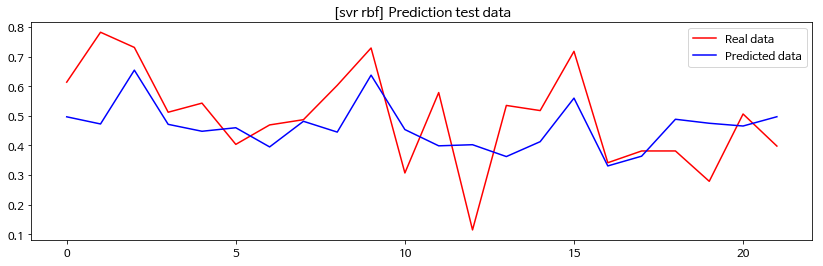

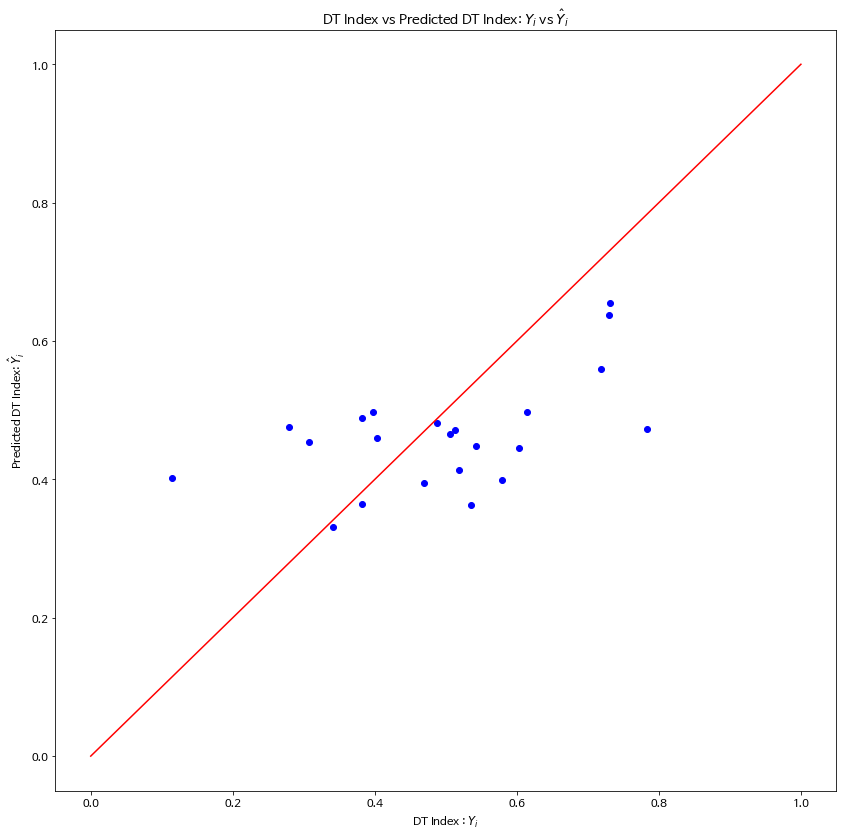

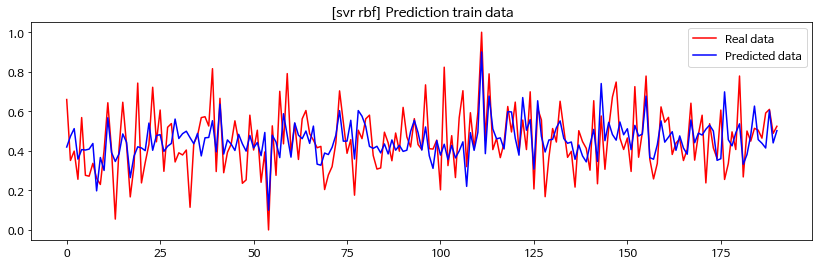

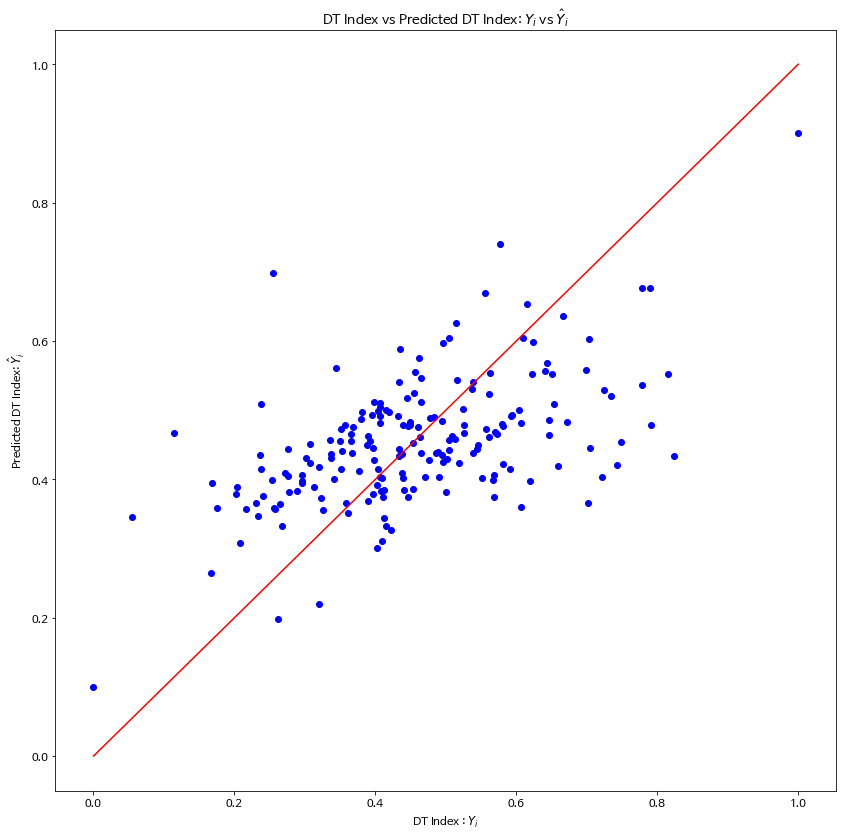

In [544]:
visualize_result(y_test.values, svr_rbf.predict(x_test), 'test data', '[svr rbf]')
visualize_result(y_train.values, svr_rbf.predict(x_train), 'train data', '[svr rbf]')

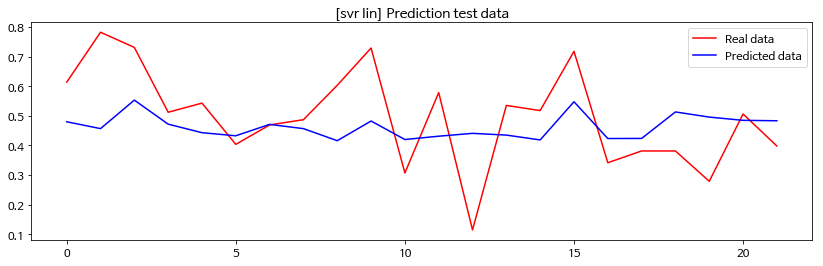

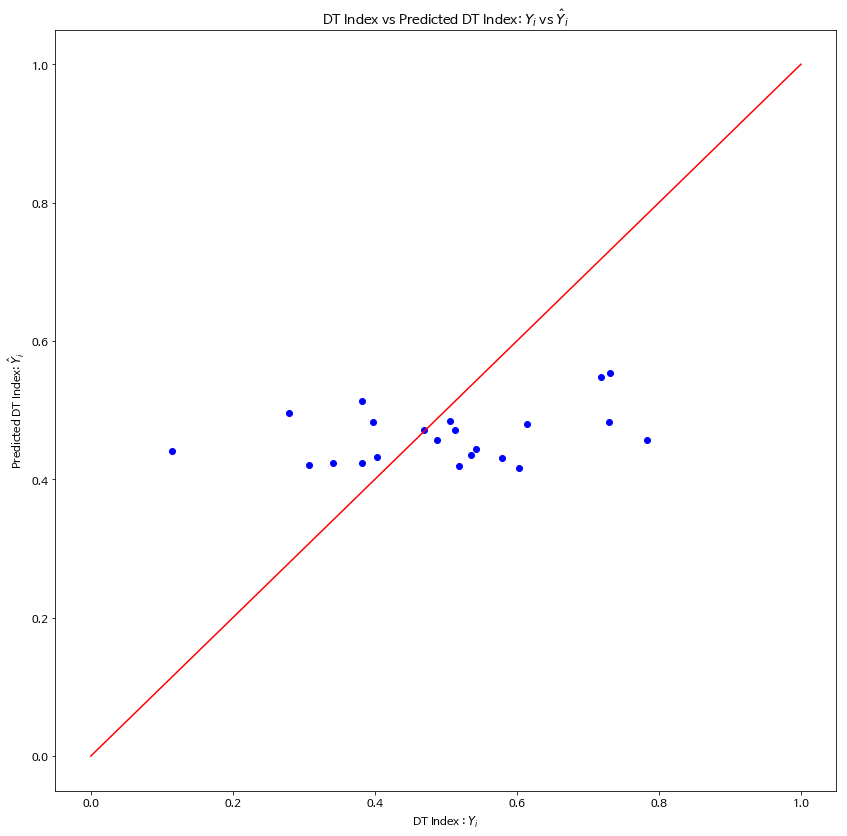

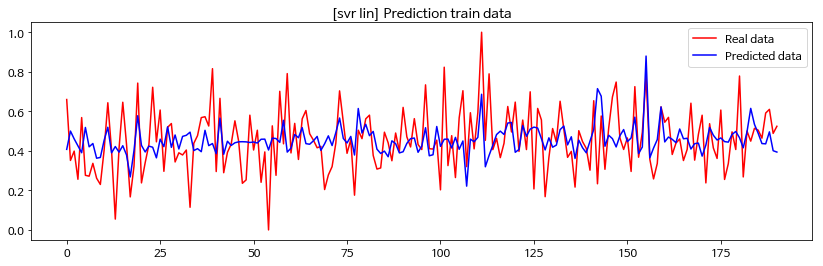

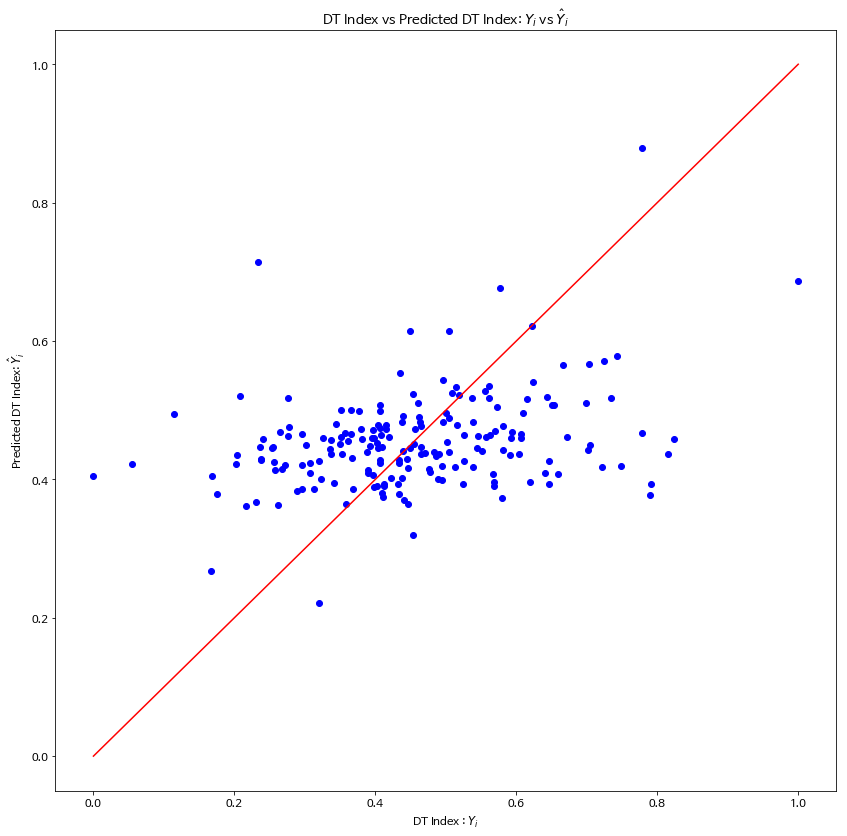

In [545]:
visualize_result(y_test.values, svr_lin.predict(x_test), 'test data', '[svr lin]')
visualize_result(y_train.values, svr_lin.predict(x_train), 'train data', '[svr lin]')

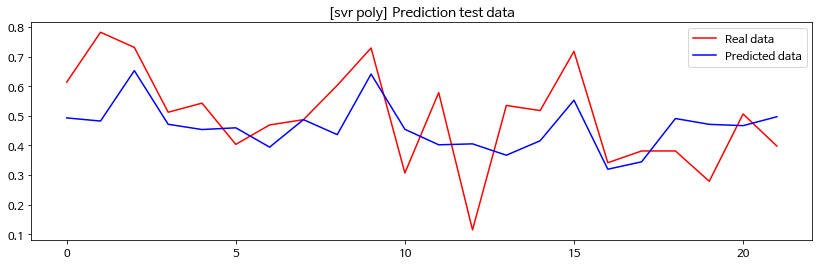

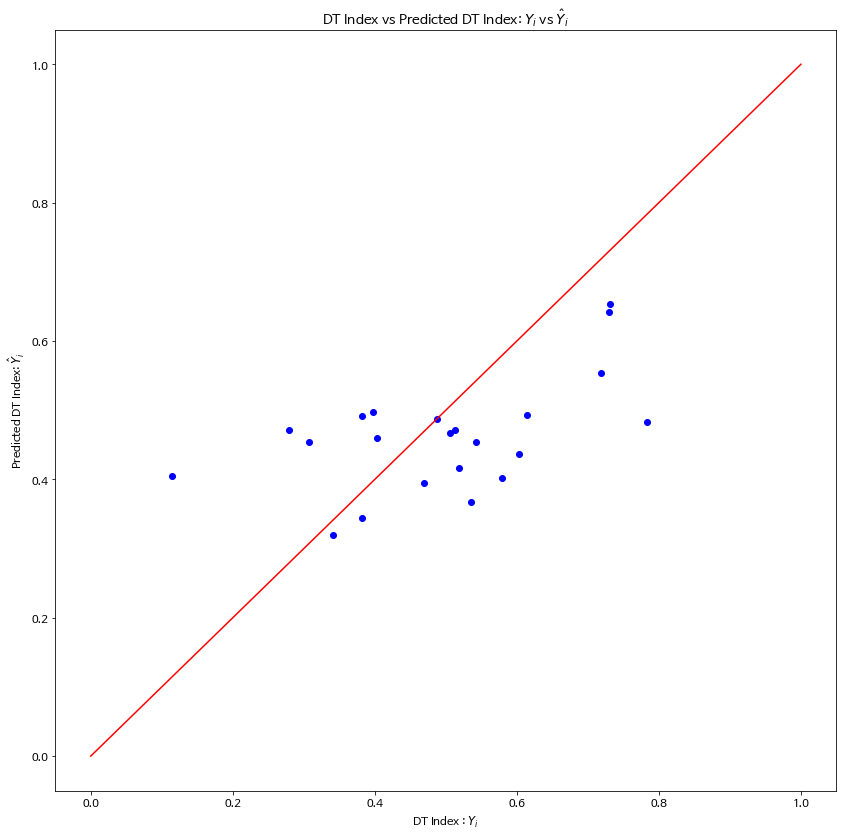

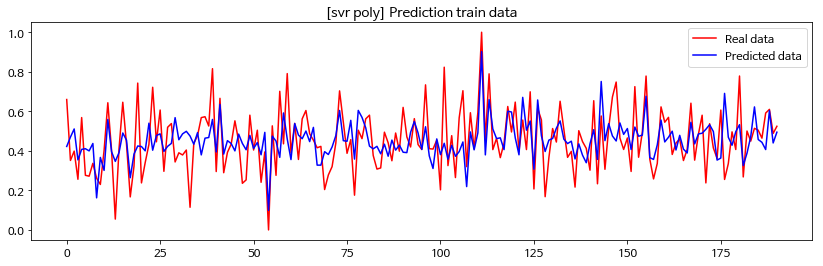

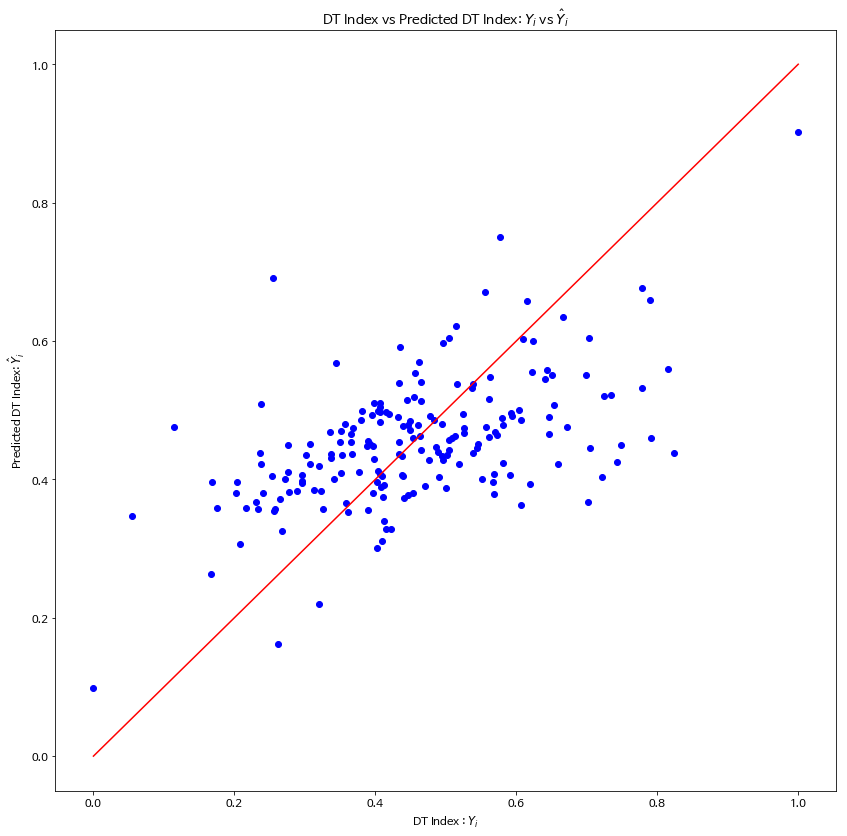

In [546]:
visualize_result(y_test.values, svr_poly.predict(x_test), 'test data', '[svr poly]')
visualize_result(y_train.values, svr_poly.predict(x_train), 'train data', '[svr poly]')

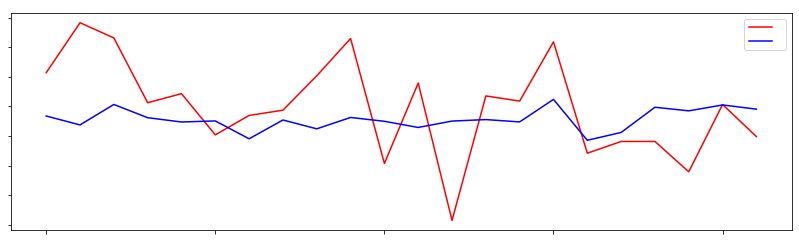

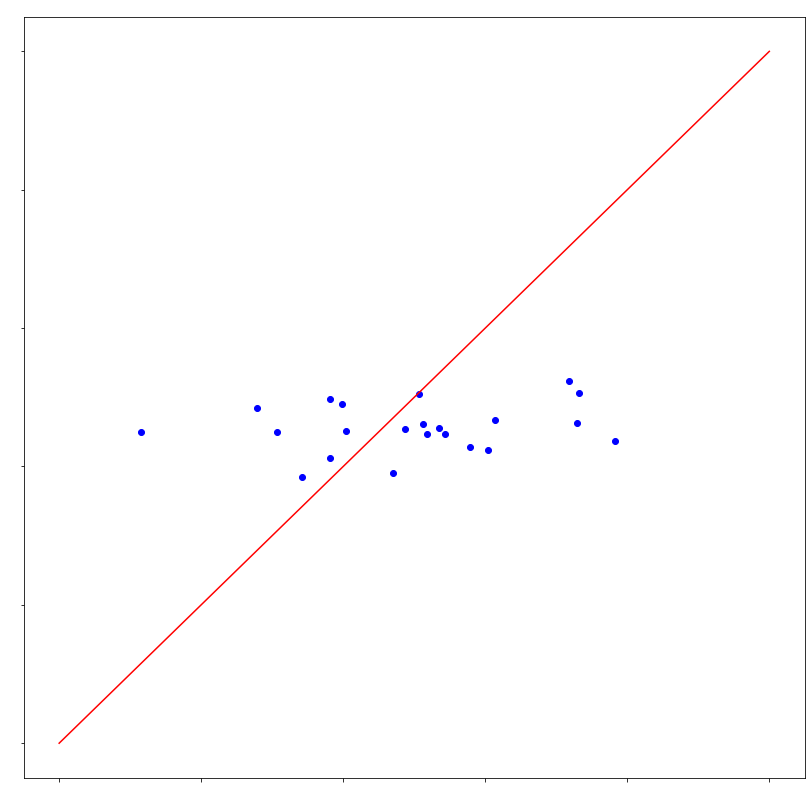

In [813]:
visualize_result(y_test.values, svr_lin.predict(x_test), 'test data', '[svr lin]')

In [579]:
model_name_list = list(kfold_model_df.columns)
model_list = [linear_model, decison_tree_regressor, forest_model, gradient_boosting_regressor, ada_boost_basic, ada_boost_regressor, MLP_regressor, svr_rbf, svr_lin, svr_poly]

for name_, model_ in zip(model_name_list, model_list):
    kfold_test_to_dicts(name_, model_, df=df, train_features=feature_names2, label_feature='score_A2', k=10)

/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.py

학습 R2 = 0.16200114, 검증 R2 = -0.20529575
학습 R2 = 0.12605369, 검증 R2 = -0.01932604
학습 R2 = 0.15510716, 검증 R2 = -0.02965392
학습 R2 = 0.16015026, 검증 R2 = -0.08787829
학습 R2 = 0.14687832, 검증 R2 = -0.31079915
학습 R2 = 0.15052211, 검증 R2 = -0.01020577
학습 R2 = 0.10962504, 검증 R2 = -0.00373921
학습 R2 = 0.16936261, 검증 R2 = -0.24007125
학습 R2 = 0.12664988, 검증 R2 = 0.18386106
학습 R2 = 0.14720875, 검증 R2 = -0.01490795
학습 R2 = 0.95302558, 검증 R2 = -0.34811585
학습 R2 = 0.97848849, 검증 R2 = -0.52614476
학습 R2 = 0.89821907, 검증 R2 = -0.68290071
학습 R2 = 0.97643831, 검증 R2 = -1.65929620
학습 R2 = 0.89245700, 검증 R2 = -1.42948289
학습 R2 = 0.96077884, 검증 R2 = -0.79783194
학습 R2 = 0.97243713, 검증 R2 = -0.36969652


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.94187619, 검증 R2 = -1.71360473
학습 R2 = 0.89131209, 검증 R2 = -0.80950973
학습 R2 = 0.88193829, 검증 R2 = -1.95378006
학습 R2 = 0.87262874, 검증 R2 = 0.12369371


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.86134851, 검증 R2 = 0.03487706


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.86341874, 검증 R2 = 0.22655743


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.87596752, 검증 R2 = -0.21755002


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.87492138, 검증 R2 = 0.09300292


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.86401830, 검증 R2 = 0.12103602


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.86351558, 검증 R2 = -0.16950629


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.88526627, 검증 R2 = -0.15351750


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.86323944, 검증 R2 = 0.23546634


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.85700103, 검증 R2 = -0.19001054
학습 R2 = 0.97091013, 검증 R2 = 0.02376342
학습 R2 = 0.96722211, 검증 R2 = 0.04879728
학습 R2 = 0.98108349, 검증 R2 = -0.47855193
학습 R2 = 0.96876582, 검증 R2 = -1.43670018
학습 R2 = 0.98281862, 검증 R2 = -1.85577880
학습 R2 = 0.98092756, 검증 R2 = -0.19031483
학습 R2 = 0.98144990, 검증 R2 = -0.85737571
학습 R2 = 0.97658889, 검증 R2 = -1.04105913
학습 R2 = 0.96454314, 검증 R2 = -1.44480976
학습 R2 = 0.98296902, 검증 R2 = -1.68997828


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.py

학습 R2 = 0.99965473, 검증 R2 = 0.01215953
학습 R2 = 0.99986417, 검증 R2 = -0.00646519
학습 R2 = 0.99939656, 검증 R2 = 0.08004047


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.99964532, 검증 R2 = -0.07638611
학습 R2 = 0.99996619, 검증 R2 = 0.03647899


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.99969050, 검증 R2 = 0.06672752
학습 R2 = 0.99943786, 검증 R2 = -0.26004448


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.99908564, 검증 R2 = -0.08683308
학습 R2 = 0.99998776, 검증 R2 = 0.18272087


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.99995258, 검증 R2 = -0.21981114


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.93280288, 검증 R2 = 0.16235059


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.93022550, 검증 R2 = 0.09053722


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.93775311, 검증 R2 = 0.09529990


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.93477335, 검증 R2 = -0.20168644


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.93616028, 검증 R2 = 0.09400293


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.93522638, 검증 R2 = 0.16280416


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.93526436, 검증 R2 = -0.05849798


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.93105099, 검증 R2 = -0.01668013


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.93490530, 검증 R2 = 0.09963274


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


학습 R2 = 0.93203507, 검증 R2 = 0.08071244


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


6/6 [==============================] - 0s 2ms/step - loss: 0.0321 - coeff_determination: -0.3141 - mse: 0.0321
학습 R2 = -0.07300464, 검증 R2 = 0.00656677


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


6/6 [==============================] - 0s 3ms/step - loss: 0.0317 - coeff_determination: -0.3695 - mse: 0.0317
학습 R2 = -0.06380901, 검증 R2 = -0.50076390


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


6/6 [==============================] - 0s 3ms/step - loss: 0.0370 - coeff_determination: -0.5946 - mse: 0.0370
학습 R2 = -0.03143419, 검증 R2 = -0.01895609


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


6/6 [==============================] - 0s 3ms/step - loss: 0.0424 - coeff_determination: -0.7508 - mse: 0.0424
학습 R2 = -0.08765948, 검증 R2 = -0.19409258


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


6/6 [==============================] - 0s 3ms/step - loss: 0.0385 - coeff_determination: -0.5746 - mse: 0.0385
학습 R2 = -0.08487962, 검증 R2 = -0.49589098


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


6/6 [==============================] - 0s 3ms/step - loss: 0.0351 - coeff_determination: -0.4727 - mse: 0.0351
학습 R2 = -0.03002739, 검증 R2 = 0.00016345


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


6/6 [==============================] - 0s 3ms/step - loss: 0.0513 - coeff_determination: -0.5251 - mse: 0.0513
학습 R2 = -0.05380465, 검증 R2 = -0.41862518


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


6/6 [==============================] - 0s 3ms/step - loss: 0.0468 - coeff_determination: -0.8700 - mse: 0.0468
학습 R2 = -0.05107592, 검증 R2 = -0.09465957


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


6/6 [==============================] - 0s 2ms/step - loss: 0.0342 - coeff_determination: -0.3640 - mse: 0.0342
학습 R2 = -0.08347031, 검증 R2 = -0.05159244


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


6/6 [==============================] - 0s 2ms/step - loss: 0.0362 - coeff_determination: -0.4322 - mse: 0.0362
학습 R2 = -0.03359469, 검증 R2 = -0.02317369
학습 R2 = 0.36048375, 검증 R2 = -0.61026355
학습 R2 = 0.32641936, 검증 R2 = -0.28772122
학습 R2 = 0.36613766, 검증 R2 = -0.30176557
학습 R2 = 0.38184977, 검증 R2 = -0.56400309
학습 R2 = 0.32410456, 검증 R2 = -1.63858096
학습 R2 = 0.35013117, 검증 R2 = -0.12156406
학습 R2 = 0.33078092, 검증 R2 = -0.93250905
학습 R2 = 0.35911008, 검증 R2 = -0.87989023
학습 R2 = 0.35268062, 검증 R2 = 0.05902066
학습 R2 = 0.35913416, 검증 R2 = -0.43379631
학습 R2 = 0.12623128, 검증 R2 = -0.02146839
학습 R2 = 0.10402894, 검증 R2 = -0.06018975


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.py

학습 R2 = 0.12269649, 검증 R2 = -0.00996171
학습 R2 = 0.12206704, 검증 R2 = -0.07915773
학습 R2 = 0.11516164, 검증 R2 = -0.20662755
학습 R2 = 0.11020097, 검증 R2 = -0.02437091
학습 R2 = 0.08361317, 검증 R2 = -0.14696991
학습 R2 = 0.14792336, 검증 R2 = -0.31639600
학습 R2 = 0.09324049, 검증 R2 = 0.29832989
학습 R2 = 0.11189280, 검증 R2 = -0.08051212


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.py

학습 R2 = 0.35193456, 검증 R2 = -0.65981309
학습 R2 = 0.31520142, 검증 R2 = -0.24748295
학습 R2 = 0.35842376, 검증 R2 = -0.29651410
학습 R2 = 0.37212477, 검증 R2 = -0.54032362
학습 R2 = 0.31454421, 검증 R2 = -2.24015928
학습 R2 = 0.34054463, 검증 R2 = -0.11387414
학습 R2 = 0.31743753, 검증 R2 = -485.30985083
학습 R2 = 0.35070982, 검증 R2 = -0.85932867
학습 R2 = 0.34095571, 검증 R2 = -0.18312861
학습 R2 = 0.34987513, 검증 R2 = -0.41677875


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.py

In [592]:
kfold_test_to_dicts('svr_poly', svr_poly, df=df, train_features=feature_names2, label_feature='score_A2', k=10)

학습 R2 = 0.15672945, 검증 R2 = -0.25696939
학습 R2 = 0.12803347, 검증 R2 = -0.13675449
학습 R2 = 0.14636140, 검증 R2 = -0.00151552
학습 R2 = 0.13597980, 검증 R2 = -0.02085697
학습 R2 = 0.15610044, 검증 R2 = -0.18028583
학습 R2 = 0.14342500, 검증 R2 = 0.00096721
학습 R2 = 0.18377970, 검증 R2 = -3.60457694
학습 R2 = 0.16010766, 검증 R2 = -0.26029087
학습 R2 = 0.12663205, 검증 R2 = -0.67133087
학습 R2 = 0.13702433, 검증 R2 = 0.00399700


/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/Users/dhkim/.py

In [593]:
kfold_test_mse_df = pd.DataFrame(kfold_test_mse)

In [607]:
kfold_test_mse_df.mean()

linear                     0.027009
decison tree               0.049351
random foreset             0.025602
gradient boosting          0.046038
adaboost decison tree      0.026479
random foreset ensemble    0.024509
mlp regressor              0.030359
svr_rbf                    0.039870
svr_lin                    0.027133
svr_poly                   0.044080
dtype: float64

In [638]:
kfold_test_df = kfold_test_df.reset_index()


In [650]:
kfold_train_df = kfold_train_df.reset_index()

In [651]:
kfold_test_mse_df = kfold_test_mse_df.reset_index()

In [652]:
kfold_train_mse_df = kfold_train_mse_df.reset_index()

In [653]:
kfold_test_df_melt = kfold_test_df.melt(id_vars=["index"], 
                        var_name="models", 
                        value_name="Value")
kfold_train_df_melt = kfold_train_df.melt(id_vars=["index"], 
                        var_name="models", 
                        value_name="Value")
kfold_test_mse_df_melt = kfold_test_mse_df.melt(id_vars=["index"], 
                        var_name="models", 
                        value_name="Value")
kfold_train_mse_df_melt = kfold_train_mse_df.melt(id_vars=["index"], 
                        var_name="models", 
                        value_name="Value")

In [654]:
plt.rcParams['font.size'] = 14

In [667]:
kfold_test_df

,index,linear,decison tree,random foreset,gradient boosting,adaboost decison tree,random foreset ensemble,mlp regressor,svr_rbf,svr_lin,svr_poly
0,0,-0.205296,-0.348116,0.123694,0.023763,0.012160,0.162351,0.006567,-0.610264,-0.021468,-0.256969
1,1,-0.019326,-0.526145,0.034877,0.048797,-0.006465,0.090537,-0.500764,-0.287721,-0.060190,-0.136754
2,2,-0.029654,-0.682901,0.226557,-0.478552,0.080040,0.095300,-0.018956,-0.301766,-0.009962,-0.001516
3,3,-0.087878,-1.659296,-0.217550,-1.436700,-0.076386,-0.201686,-0.194093,-0.564003,-0.079158,-0.020857
4,4,-0.310799,-1.429483,0.093003,-1.855779,0.036479,0.094003,-0.495891,-1.638581,-0.206628,-0.180286
5,5,-0.010206,-0.797832,0.121036,-0.190315,0.066728,0.162804,0.000163,-0.121564,-0.024371,0.000967
6,6,-0.003739,-0.369697,-0.169506,-0.857376,-0.260044,-0.058498,-0.418625,-0.932509,-0.146970,-3.604577
7,7,-0.240071,-1.713605,-0.153517,-1.041059,-0.086833,-0.016680,-0.094660,-0.879890,-0.316396,-0.260291
8,8,0.183861,-0.809510,0.235466,-1.444810,0.182721,0.099633,-0.051592,0.059021,0.298330,-0.671331
9,9,-0.014908,-1.953780,-0.190011,-1.689978,-0.219811,0.080712,-0.023174,-0.433796,-0.080512,0.003997


In [665]:
kfold_test_df.max()

index                      9.000000
linear                     0.183861
decison tree              -0.348116
random foreset             0.235466
gradient boosting          0.048797
adaboost decison tree      0.182721
random foreset ensemble    0.162804
mlp regressor              0.006567
svr_rbf                    0.059021
svr_lin                    0.298330
svr_poly                   0.003997
dtype: float64

In [666]:
kfold_train_df.max()

index                      9.000000
linear                     0.169363
decison tree               0.978488
random foreset             0.885266
gradient boosting          0.982969
adaboost decison tree      0.999988
random foreset ensemble    0.937753
mlp regressor             -0.030027
svr_rbf                    0.381850
svr_lin                    0.147923
svr_poly                   0.183780
dtype: float64

In [660]:
kfold_test_df.mean()

index                      4.500000
linear                    -0.073802
decison tree              -1.029036
random foreset             0.010405
gradient boosting         -0.892201
adaboost decison tree     -0.027141
random foreset ensemble    0.050848
mlp regressor             -0.179102
svr_rbf                   -0.571107
svr_lin                   -0.064732
svr_poly                  -0.512762
dtype: float64

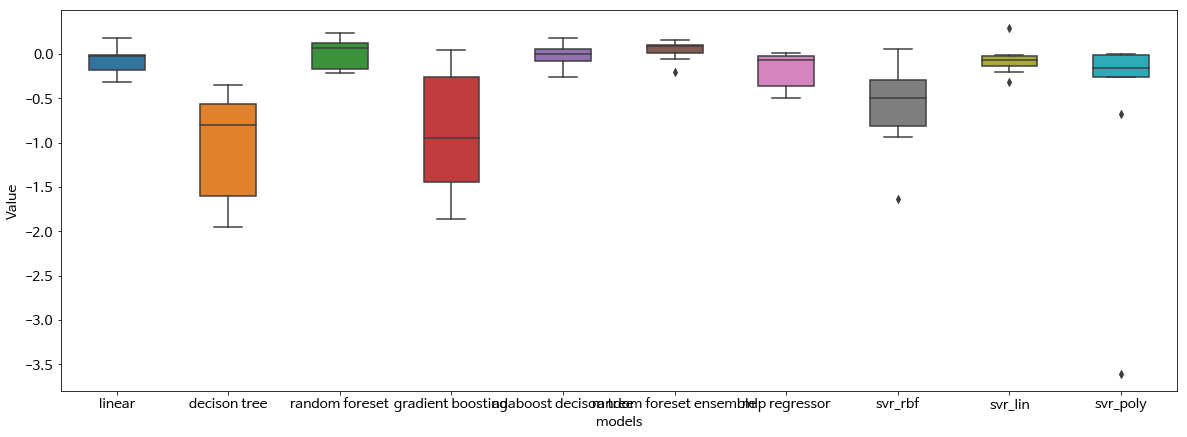

In [655]:
plt.figure(figsize=(20,7))
sns.boxplot('models', 'Value', data=kfold_test_df_melt, width=0.5)

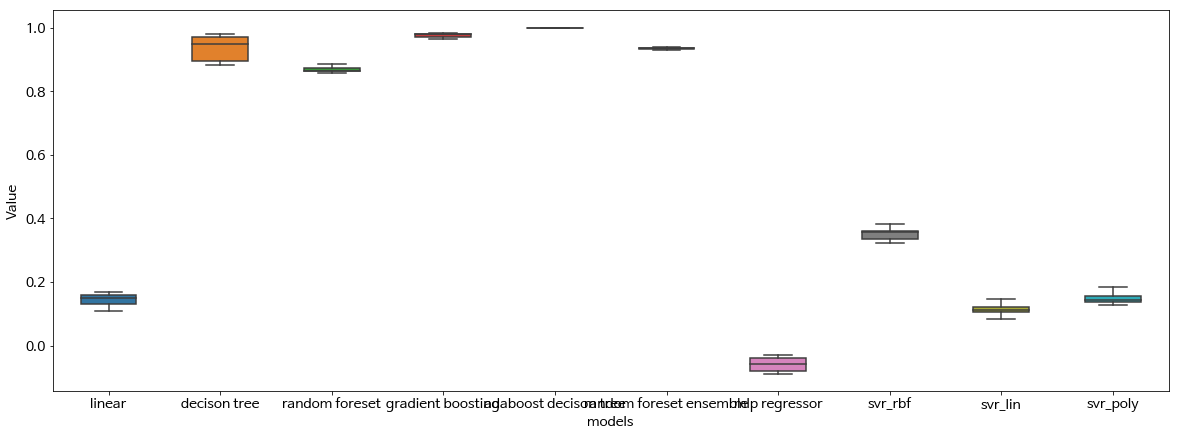

In [656]:
plt.figure(figsize=(20,7))
sns.boxplot('models', 'Value', data=kfold_train_df_melt, width=0.5)

In [663]:
kfold_test_mse_df

,index,linear,decison tree,random foreset,gradient boosting,adaboost decison tree,random foreset ensemble,mlp regressor,svr_rbf,svr_lin,svr_poly
0,0,0.031541,0.035279,0.022932,0.025547,0.025851,0.021920,0.025997,0.042139,0.026731,0.032894
1,1,0.029817,0.044642,0.028231,0.027824,0.029440,0.026603,0.043899,0.037668,0.031012,0.033252
2,2,0.024955,0.040788,0.018746,0.035835,0.022297,0.021927,0.024696,0.031551,0.024478,0.024274
3,3,0.036902,0.090206,0.041301,0.082655,0.036512,0.040762,0.040505,0.053053,0.036606,0.034628
4,4,0.020384,0.037781,0.014105,0.044410,0.014984,0.014089,0.023263,0.041033,0.018764,0.018355
5,5,0.022129,0.039382,0.019254,0.026074,0.020444,0.018339,0.021902,0.024568,0.022439,0.021884
6,6,0.043252,0.059021,0.050395,0.080036,0.054296,0.045612,0.061130,0.083274,0.049424,0.198415
7,7,0.029056,0.063583,0.027028,0.047824,0.025466,0.023822,0.025649,0.044048,0.030845,0.029530
8,8,0.015103,0.033486,0.014148,0.045242,0.015124,0.016662,0.019460,0.017413,0.012985,0.030929
9,9,0.016953,0.049341,0.019878,0.044934,0.020376,0.015356,0.017091,0.023950,0.018049,0.016637


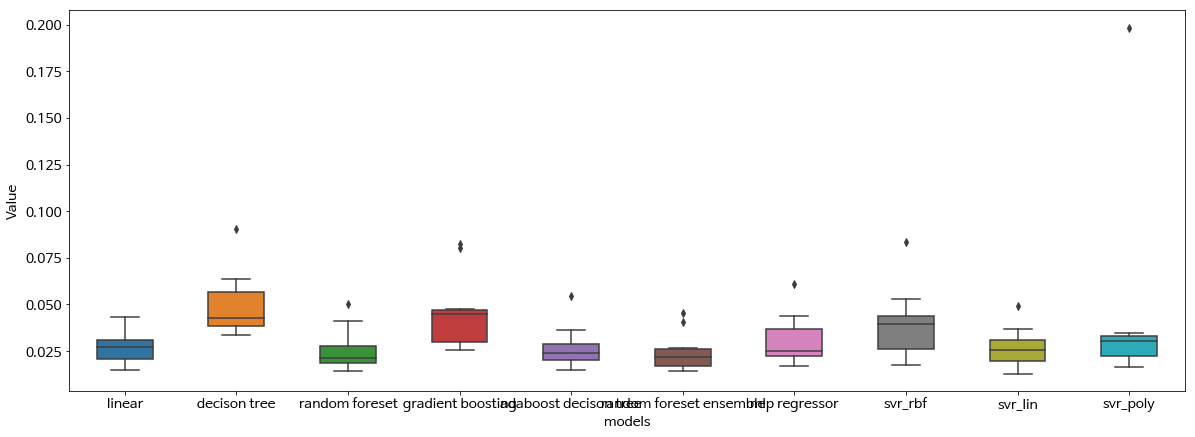

In [657]:
plt.figure(figsize=(20,7))
sns.boxplot('models', 'Value', data=kfold_test_mse_df_melt, width=0.5)

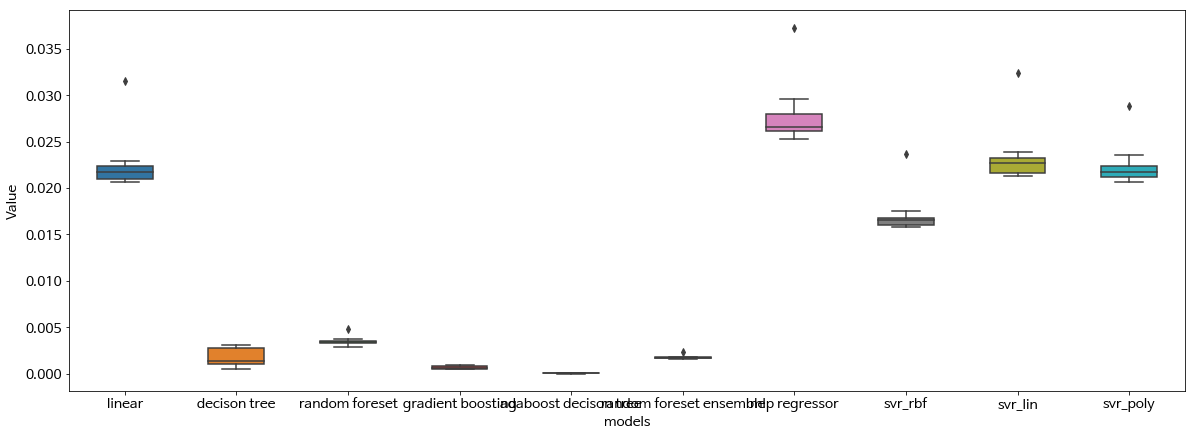

In [658]:
plt.figure(figsize=(20,7))
sns.boxplot('models', 'Value', data=kfold_train_mse_df_melt, width=0.5)

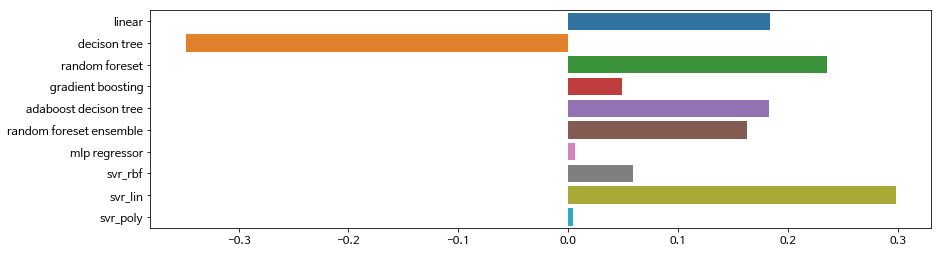

In [625]:
sns.barplot(kfold_test_df.max().values, kfold_test_df.max().index)

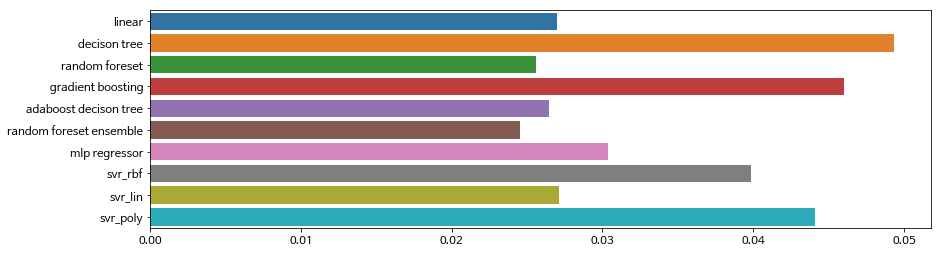

In [623]:
sns.barplot(kfold_test_mse_df.mean().values, kfold_test_mse_df.mean().index)

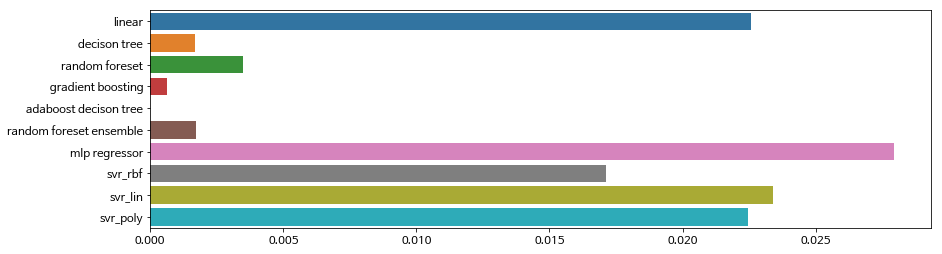

In [622]:
sns.barplot(kfold_train_mse_df.mean().values, kfold_train_mse_df.mean().index)

In [594]:
kfold_test_mse_df.mean()

linear                     0.027009
decison tree               0.049351
random foreset             0.025602
gradient boosting          0.046038
adaboost decison tree      0.026479
random foreset ensemble    0.024509
mlp regressor              0.030359
svr_rbf                    0.039870
svr_lin                    0.027133
svr_poly                   0.044080
dtype: float64

In [598]:
kfold_test_df.mean()

linear                    -0.073802
decison tree              -1.029036
random foreset             0.010405
gradient boosting         -0.892201
adaboost decison tree     -0.027141
random foreset ensemble    0.050848
mlp regressor             -0.179102
svr_rbf                   -0.571107
svr_lin                   -0.064732
svr_poly                  -0.512762
dtype: float64

In [599]:
kfold_train_df.mean()

linear                     0.145356
decison tree               0.934697
random foreset             0.868133
gradient boosting          0.975728
adaboost decison tree      0.999668
random foreset ensemble    0.934020
mlp regressor             -0.059276
svr_rbf                    0.351083
svr_lin                    0.113706
svr_poly                   0.147417
dtype: float64

In [637]:
kfold_test_df = pd.DataFrame(kfold_test_scores)
kfold_train_df = pd.DataFrame(kfold_train_scores)
kfold_model_df = pd.DataFrame(kfold_models)
kfold_test_mse_df = pd.DataFrame(kfold_test_mse)
kfold_train_mse_df = pd.DataFrame(kfold_train_mse)

In [557]:
kfold_test_df.to_excel('kfold_test_df.xlsx', index=False)

In [558]:
kfold_train_df.to_excel('kfold_train_df.xlsx', index=False)